# Подготовка



## Подключение библиотек

In [69]:
# Python
import os
import random
import zipfile

# Jupiter
from tqdm.auto import tqdm

# Data work
import pandas as pd

# Math
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

## Создание общих вспомогательных объектов

In [2]:
class CFG:
    '''
    Конфигурационный класс, хранящий различные константы, флаги и прочее
    '''
    # Technical
    seed = 2024

    # Path
    general_folder_path = "../"
    data_path = f"{general_folder_path}data/"

In [3]:
#Фиксация сидов для воспроизводимости
def seed_everything(seed):
    random.seed(seed) # фиксируем генератор случайных чисел
    os.environ['PYTHONHASHSEED'] = str(seed) # фиксируем заполнения хешей
    np.random.seed(seed) # фиксируем генератор случайных чисел numpy

In [4]:
seed_everything(CFG.seed)

# Датасет

## Описание

[Ссылка на датасет](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data)

Данный датасет содержит информацию о продажах более 500к автомобилей в США, а именно:

* year - год изготовления
* make - бренд
* model - модель
* trim - линейка модели
* body - тип корпуса
* transmission - тип трансмиссии
* vin - регистрационный номер
* state - штат регистрации
* condition - оценка остояния автомобиля (от 1 до 50)
* odometer - пробег автомобиля в милях
* color - внешний цвет
* interior - цвет интерьера
* seller - субъект, продающий автомобиль
* mmr - рекомендуемая цена (Manheim Market Report)
* sellingprice - реальная цена продажи
* saledate - дата продажи

В ходе данной работы будем учить модель предсказывать реальную цену продажи (sellingprice), т.е. будем решать задачу регрессии

Регистрационный номер (vin) не будем использовать в качестве признака, т.к. он не несёт особой полезной информации для нашей задачи. Таким образом, изначально каждый объект будет описываться 14 признаками.

## Загрузка

In [6]:
!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

Dataset URL: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
License(s): MIT




  0%|          | 0.00/18.8M [00:00<?, ?B/s]
  5%|▌         | 1.00M/18.8M [00:00<00:11, 1.66MB/s]
 11%|█         | 2.00M/18.8M [00:00<00:05, 3.27MB/s]
 21%|██        | 4.00M/18.8M [00:00<00:02, 5.97MB/s]
 32%|███▏      | 6.00M/18.8M [00:01<00:01, 7.74MB/s]
 42%|████▏     | 8.00M/18.8M [00:01<00:01, 8.82MB/s]
 53%|█████▎    | 10.0M/18.8M [00:01<00:00, 9.69MB/s]
 64%|██████▎   | 12.0M/18.8M [00:01<00:00, 10.3MB/s]
 74%|███████▍  | 14.0M/18.8M [00:01<00:00, 10.7MB/s]
 85%|████████▍ | 16.0M/18.8M [00:02<00:00, 10.2MB/s]
 96%|█████████▌| 18.0M/18.8M [00:02<00:00, 11.5MB/s]
100%|██████████| 18.8M/18.8M [00:02<00:00, 8.72MB/s]


In [9]:
with zipfile.ZipFile("vehicle-sales-data.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

In [10]:
dt = pd.read_csv("car_prices.csv")
dt.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Чистка

Информация о датасете

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
prepared_dt = dt
prepared_dt.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Некорректные данные

Посмотрим на значения, которые встречаются в каждом столбце

In [ ]:
for column in prepared_dt.columns:
    print(f"Unique values for {column} column")
    unique_values = prepared_dt[column].unique()
    print(unique_values, end="\n\n")

Unique values for year column
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]

Unique values for make column
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 

Видно, что в некоторых столбцах присутсвуют некорректные данные, а именно:
- 'state' - имеются номера автомобилей, вместо названия штата
- 'color' - числа вместо названия цветов, могут быть номерами цветов
- 'transmission' - значения "Sedan" и "sedan" явно не являются типом трансмиссии

Наиболее странными являются номера автомобилей в колонке state, поэтому посмотрим на данные строки

In [ ]:
not_state_mask = prepared_dt["state"].apply(lambda s: len(s) > 2)
prepared_dt[not_state_mask]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000


Судя по всему, при сборе данных произошла некоторая ошибка и значения многих столбцов сместились в последующие столбцы. Некоторые значения при этом были потеряны (seller и saledate), в связи с этим, а также из-за небольшого количества таких некорректных объектов, попросту удалим их из датасета

In [ ]:
prepared_dt = prepared_dt.drop(prepared_dt[not_state_mask].index, axis=0).reset_index(drop=True)

In [ ]:
not_state_count = sum(prepared_dt["state"].apply(lambda s: len(s) > 2))
print(f"Actual non-state row count: {not_state_count}")

Actual non-state row count: 0


In [ ]:
prepared_dt.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
for column in prepared_dt.columns:
    print(f"Unique values for {column} column")
    unique_values = prepared_dt[column].unique()
    print(unique_values, end="\n\n")

Unique values for year column
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]

Unique values for make column
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 

Благодаря этому мы также избавились от аномальных значений в 'color' и 'transmission'.

 Заметим теперь, что в столбцах 'color' и 'interior' есть значение '—'. По смыслу, скорее всего, оно соответствует отсутствию данных, а значит его целесообразно было бы заменить на ***NaN***

In [ ]:
prepared_dt[["color", "interior"]] = prepared_dt[["color", "interior"]].replace('—', float("nan"))

In [ ]:
for column in ["color", "interior"]:
    print(f"Unique values for {column} column")
    unique_values = prepared_dt[column].unique()
    print(unique_values, end="\n\n")

Unique values for color column
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' nan 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime']

Unique values for interior column
['black' 'beige' 'tan' nan 'gray' 'brown' 'burgundy' 'white' 'silver'
 'off-white' 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold']



### Дубликаты vin

Регистрационный номер автомобиля (vin) должен быть уникальным, поэтому посмотрим на дубликаты среди номеров

In [ ]:
duplicated_mask = prepared_dt["vin"].duplicated()
print(f"Количество дубликатов номеров vin: {sum(duplicated_mask)}")

Количество дубликатов номеров vin: 8515


In [ ]:
duplicated_vins = prepared_dt["vin"][duplicated_mask].unique()
for dup_vin in duplicated_vins[:5]:
    print(f"Duplicates for {dup_vin}")
    display(prepared_dt[prepared_dt["vin"] == dup_vin])

Duplicates for 2cndl13f056137366


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
4158,2005,Chevrolet,Equinox,LS,SUV,NaN,2cndl13f056137366,ca,NaN,NaN,NaN,NaN,buena park honda,3250.0,27500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
7231,2005,Chevrolet,Equinox,LS,SUV,automatic,2cndl13f056137366,ca,NaN,125141.0,red,NaN,buena park honda,3550.0,3300.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)


Duplicates for wbagn63403ds43612


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
4685,2003,BMW,7 Series,745Li,Sedan,NaN,wbagn63403ds43612,ca,NaN,NaN,NaN,NaN,prestige auto wholesale inc,4900.0,3700.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
7463,2003,BMW,7 Series,745Li,Sedan,automatic,wbagn63403ds43612,ca,24.0,212596.0,white,black,prestige auto wholesale inc,1675.0,3300.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)


Duplicates for 1gket63m672242776


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
18116,2007,GMC,Envoy,Denali,SUV,NaN,1gket63m672242776,va,NaN,1.0,gray,NaN,blue knob auto sales inc,13800.0,1800.0,Thu Dec 18 2014 09:05:00 GMT-0800 (PST)
18120,2007,GMC,Envoy,Denali,SUV,automatic,1gket63m672242776,va,35.0,119475.0,gray,gray,blue knob auto sales inc,7725.0,7400.0,Thu Dec 18 2014 09:05:00 GMT-0800 (PST)


Duplicates for 5n1ar18w77c615027


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
19019,2007,Nissan,Pathfinder,LE,SUV,automatic,5n1ar18w77c615027,nj,NaN,113587.0,gray,NaN,awn sales ltd,6850.0,7200.0,Wed Dec 17 2014 09:30:00 GMT-0800 (PST)
19043,2007,Nissan,Pathfinder,SE,SUV,NaN,5n1ar18w77c615027,nj,NaN,1.0,gray,NaN,awn sales ltd,10600.0,2600.0,Wed Dec 17 2014 09:30:00 GMT-0800 (PST)


Duplicates for 2hnyd182x4h516719


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
23576,2004,Acura,MDX,Base,SUV,automatic,2hnyd182x4h516719,il,NaN,186291.0,silver,NaN,silver auto sales inc,2475.0,3500.0,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
23612,2004,Acura,MDX,Base,SUV,NaN,2hnyd182x4h516719,il,NaN,1.0,NaN,NaN,silver auto sales inc,7100.0,1500.0,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


Видно, что объекты с одинаковым vin практически идентичны, однако в каждой группе объектов с одинаковым vin один из объектов имеет больше пропусков, при чём это может быть как один объект, так и другой. Поэтому мы не можем просто удалить дублирующиеся строки по позиции.

Избавимся от дубликатов следующим образом:

1. Для каждого vin, который имеет дубликаты, последовательно рассмотрим все объекты с данным vin. Будем рассматривать объекты в парах.

2. Для каждого объекта в паре посчитаем количество пропусков (***NaN***) во всех столбцах. Сохраним тот объект, у которого меньше пропусков, а оставшийся исключим из таблицы.

3. В случае, если у обоих объектов будет равное количество пропусков, не будем их трогать, но сохраним данный vin в отдельный список для последующего дополнительного анализа

In [ ]:
duplicated_mask = prepared_dt["vin"].duplicated()
duplicated_vins = prepared_dt["vin"][duplicated_mask].unique()

remains_vins = set()
temp_dt = prepared_dt

for dup_vin in tqdm(duplicated_vins, desc="Duplicates"):
    dup_objs = temp_dt[temp_dt["vin"] == dup_vin]
    masks = dup_objs.isna()
    current_obj = masks.iloc[0]
    for _, next_obj in masks.iloc[1:].iterrows():
        current_sum = sum(current_obj)
        next_sum = sum(next_obj)
        if current_sum > next_sum:
            temp_dt = temp_dt.drop(current_obj.name)
            current_obj = next_obj
        elif current_sum < next_sum:
            temp_dt = temp_dt.drop(next_obj.name)
        else:
            remains_vins.add(dup_vin)

Duplicates:   0%|          | 0/8326 [00:00<?, ?it/s]

In [ ]:
prepared_dt = temp_dt.reset_index(drop=True)

In [ ]:
print(f"Remain vins: {len(remains_vins)}")

Remain vins: 6507


In [ ]:
for dup_vin in list(remains_vins)[:5]:
    print(f"Duplicates for {dup_vin}")
    display(prepared_dt[prepared_dt["vin"] == dup_vin])

Duplicates for 4t1bg22kxxu430406


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
29284,1999,Toyota,Camry,LE,Sedan,NaN,4t1bg22kxxu430406,va,25.0,69341.0,beige,gray,browns arlington honda,2100.0,3700.0,Thu Dec 18 2014 09:05:00 GMT-0800 (PST)
145641,1999,Toyota,Camry,LE,Sedan,NaN,4t1bg22kxxu430406,va,35.0,69833.0,gray,gray,lance adams auto sales llc,2150.0,4000.0,Thu Jan 22 2015 01:35:00 GMT-0800 (PST)


Duplicates for 1ftlr4fe8bpa76864


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
291198,2011,Ford,Ranger,SPORT,SuperCab,manual,1ftlr4fe8bpa76864,mi,5.0,13342.0,blue,black,automobiles paille inc,18650.0,18100.0,Thu Feb 26 2015 01:30:00 GMT-0800 (PST)
335503,2011,Ford,Ranger,SPORT,SuperCab,manual,1ftlr4fe8bpa76864,mi,5.0,13343.0,blue,black,automobiles paille inc,19150.0,17600.0,Thu Feb 19 2015 01:30:00 GMT-0800 (PST)


Duplicates for 1fm5k7d87dgb88209


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
163804,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k7d87dgb88209,oh,48.0,36660.0,black,black,wholesale inc # 2,25100.0,25000.0,Tue Jan 27 2015 01:30:00 GMT-0800 (PST)
304930,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k7d87dgb88209,oh,44.0,36787.0,black,black,meridian remarketing,24700.0,24200.0,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)


Duplicates for 3ln6l2gk3er823464


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
40870,2014,Lincoln,MKZ,Base,Sedan,automatic,3ln6l2gk3er823464,mn,NaN,22199.0,blue,tan,avis rent a car systems/tra,24100.0,14600.0,Tue Dec 23 2014 14:00:00 GMT-0800 (PST)
549972,2014,Lincoln,MKZ,Base,sedan,automatic,3ln6l2gk3er823464,mn,37.0,24165.0,NaN,beige,dml remarketing,23400.0,23400.0,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)


Duplicates for wvwaf63d048006540


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
377593,2004,Volkswagen,Phaeton,V8,Sedan,automatic,wvwaf63d048006540,fl,22.0,78341.0,silver,gray,d&a fine cars,6250.0,7400.0,Fri Feb 27 2015 01:25:00 GMT-0800 (PST)
443361,2004,Volkswagen,Phaeton,V8,Sedan,automatic,wvwaf63d048006540,fl,29.0,78355.0,silver,gray,d&a fine cars,6950.0,7600.0,Fri May 22 2015 02:25:00 GMT-0700 (PDT)


Можно заметить, что у оставшихся дубликатов различается дата, т.е. скорее всего один и тот же автомобиль продавался несколько раз. В таком случае для нас это разные "объекты" и удалять их нет смысла.

Однако нам необходимо проверить, у всех ли дубликатов различается дата

In [ ]:
final_vins = []
for dup_vin in tqdm(remains_vins):
    same_vin_dt = prepared_dt[prepared_dt["vin"] == dup_vin]
    mask = same_vin_dt["saledate"].duplicated()
    if sum(mask) == 0:
        continue
    final_vins.append(dup_vin)

  0%|          | 0/6507 [00:00<?, ?it/s]

In [ ]:
with open(CFG.data_path + 'final_vins.txt', 'w') as fp:
    for vin in final_vins:
        fp.write(f"{vin}\n")

In [13]:
final_vins = []
with open(CFG.data_path + 'final_vins.txt', 'r') as fp:
    for line in fp:
        final_vins.append(line[:-1])

In [14]:
print(f"Remain vins: {len(final_vins)}")

Remain vins: 66


In [ ]:
for dup_vin in final_vins:
    print(f"Duplicates for {dup_vin}")
    display(prepared_dt[prepared_dt["vin"] == dup_vin])

Duplicates for 1zvft80n255109966


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
47070,2005,Ford,Mustang,Deluxe,Coupe,automatic,1zvft80n255109966,oh,27.0,1.0,blue,gray,car now acceptance co/columbus,7975.0,200.0,Wed Dec 31 2014 09:00:00 GMT-0800 (PST)
66839,2005,Ford,Mustang,Deluxe,Coupe,automatic,1zvft80n255109966,oh,27.0,153222.0,blue,gray,car now acceptance co/columbus,3925.0,2600.0,Wed Dec 31 2014 09:00:00 GMT-0800 (PST)


Duplicates for 1hgcf86691a076674


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
55270,2001,Honda,Accord,Value Package,Sedan,NaN,1hgcf86691a076674,oh,1.0,1.0,silver,gray,select remarketing group llc/loan max title,2300.0,300.0,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
67542,2001,Honda,Accord,Value Package,Sedan,NaN,1hgcf86691a076674,oh,1.0,147368.0,silver,gray,select remarketing group llc/loan max title,1525.0,1150.0,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)


Duplicates for 2g1wg5e34d1248454


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
397444,2013,Chevrolet,Impala,LT Fleet,Sedan,automatic,2g1wg5e34d1248454,oh,27.0,39263.0,white,gray,wells fargo dealer services,10150.0,11800.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
410333,2013,Chevrolet,Impala,LT Fleet,Sedan,automatic,2g1wg5e34d1248454,oh,27.0,39263.0,white,gray,ohio auto sales (ab),10150.0,9100.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)


Duplicates for 1ftzx0727ykb48432


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
67618,2000,Ford,F-150,XLT,Extended Cab,automatic,1ftzx0727ykb48432,pr,18.0,1.0,black,tan,pr auto loans llc,4650.0,500.0,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)
149553,2000,Ford,F-150,XLT,Extended Cab,automatic,1ftzx0727ykb48432,pr,19.0,177642.0,black,tan,pr auto loans llc,2275.0,2500.0,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)


Duplicates for 1lnhl9ft3dg604165


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
362372,2013,Lincoln,MKS,Base,Sedan,automatic,1lnhl9ft3dg604165,tn,48.0,38896.0,NaN,tan,ford motor credit company llc,23400.0,25600.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
533575,2013,Lincoln,MKS,Base,sedan,automatic,1lnhl9ft3dg604165,fl,48.0,38896.0,NaN,tan,ars/ford-lincoln dealer program,23400.0,23800.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)


Duplicates for wdddj72x27a080493


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
243821,2007,Mercedes-Benz,CLS-Class,CLS550,Sedan,automatic,wdddj72x27a080493,mo,21.0,79869.0,gray,black,wildwood auto plaza,15400.0,15800.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
333016,2007,Mercedes-Benz,CLS-Class,CLS550,Sedan,automatic,wdddj72x27a080493,mo,21.0,79869.0,gray,black,car city llc,15400.0,17000.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)


Duplicates for 1g2hx52k84u256786


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
145355,2004,Pontiac,Bonneville,SE,Sedan,automatic,1g2hx52k84u256786,nc,37.0,1.0,white,gray,dt inventory,2275.0,2200.0,Tue Jan 20 2015 00:30:00 GMT-0800 (PST)
167049,2004,Pontiac,Bonneville,SE,Sedan,automatic,1g2hx52k84u256786,nc,2.0,194328.0,white,gray,dt inventory,1475.0,900.0,Tue Jan 20 2015 00:30:00 GMT-0800 (PST)


Duplicates for 3n1ab61e18l727015


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
228190,2008,Nissan,Sentra,2.0 S,Sedan,NaN,3n1ab61e18l727015,ca,25.0,1.0,blue,gray,tidalwave finance corp,6825.0,2000.0,Wed Feb 04 2015 04:05:00 GMT-0800 (PST)
251244,2008,Nissan,Sentra,2.0 S,Sedan,NaN,3n1ab61e18l727015,ca,25.0,125303.0,blue,gray,tidalwave finance corp,3975.0,3800.0,Wed Feb 04 2015 04:05:00 GMT-0800 (PST)


Duplicates for 2cndl73f956065330


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
311217,2005,Chevrolet,Equinox,LT,SUV,automatic,2cndl73f956065330,mo,29.0,1.0,gold,tan,capital finance loans llc,6775.0,200.0,Tue Feb 17 2015 03:00:00 GMT-0800 (PST)
315304,2005,Chevrolet,Equinox,LT,SUV,automatic,2cndl73f956065330,mo,43.0,123526.0,gold,tan,capital finance loans llc,3775.0,3900.0,Tue Feb 17 2015 03:00:00 GMT-0800 (PST)


Duplicates for 1g6ky54973u197868


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
549612,2003,Cadillac,Seville,STS,sedan,automatic,1g6ky54973u197868,oh,21.0,135318.0,white,beige,aex credit services,1525.0,1050.0,Thu Jun 18 2015 02:00:00 GMT-0700 (PDT)
555373,2003,Cadillac,Seville,STS,sedan,automatic,1g6ky54973u197868,oh,21.0,135321.0,white,beige,aex credit services,1325.0,700.0,Thu Jun 18 2015 02:00:00 GMT-0700 (PDT)


Duplicates for 1zvbp8cf8c5244681


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
444785,2012,Ford,Mustang,GT,Coupe,manual,1zvbp8cf8c5244681,sc,31.0,98751.0,silver,black,andrew thomas motorcars,15150.0,15600.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
520615,2012,Ford,Mustang,GT,coupe,manual,1zvbp8cf8c5244681,sc,31.0,98751.0,silver,black,andrew thomas motorcars,15150.0,16200.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)


Duplicates for jtebu11f98k013010


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
370225,2008,Toyota,FJ Cruiser,Base,SUV,automatic,jtebu11f98k013010,oh,43.0,1.0,white,gray,remarketing by ge/columbus metro fcu,20300.0,3900.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST)
376728,2008,Toyota,FJ Cruiser,Base,SUV,automatic,jtebu11f98k013010,oh,43.0,68100.0,white,gray,remarketing by ge/columbus metro fcu,18200.0,19800.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST)


Duplicates for kmhtc6adxcu042032


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
473718,2012,Hyundai,Veloster,Base,hatchback,automatic,kmhtc6adxcu042032,nv,38.0,80367.0,red,red,henderson hyundai superstore,10200.0,9500.0,Fri May 29 2015 04:55:00 GMT-0700 (PDT)
485369,2012,Hyundai,Veloster,Base,hatchback,automatic,kmhtc6adxcu042032,nv,36.0,80369.0,red,black,unique autos,10250.0,11000.0,Fri May 29 2015 04:55:00 GMT-0700 (PDT)


Duplicates for 1b3hb48bx7d113596


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
17526,2007,Dodge,Caliber,SXT,Wagon,automatic,1b3hb48bx7d113596,ga,2.0,1.0,red,gray,charitable adult rides services/car donating is,5100.0,2300.0,Thu Jan 22 2015 04:30:00 GMT-0800 (PST)
184796,2007,Dodge,Caliber,SXT,Wagon,automatic,1b3hb48bx7d113596,ga,2.0,326716.0,red,gray,charitable adult rides services/car donating is,1175.0,900.0,Thu Jan 22 2015 04:30:00 GMT-0800 (PST)


Duplicates for 1n4al11d06n460618


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
149203,2006,Nissan,Altima,2.5 S,Sedan,automatic,1n4al11d06n460618,md,1.0,1.0,black,black,tower fcu,6325.0,2000.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
170542,2006,Nissan,Altima,2.5 S,Sedan,automatic,1n4al11d06n460618,md,1.0,94379.0,black,black,tower fcu,4550.0,3400.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)


Duplicates for 3vwcd31y75m303415


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
306837,2005,Volkswagen,New Beetle,GLS 1.8T,Convertible,automatic,3vwcd31y75m303415,nv,1.0,1.0,yellow,black,honor finance corporation,5775.0,2900.0,Thu Feb 19 2015 03:00:00 GMT-0800 (PST)
338996,2005,Volkswagen,New Beetle,GLS 1.8T,Convertible,automatic,3vwcd31y75m303415,nv,1.0,72434.0,yellow,black,honor finance corporation,4500.0,2600.0,Thu Feb 19 2015 03:00:00 GMT-0800 (PST)


Duplicates for 1gkfk63858j153055


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
474725,2008,GMC,Yukon,Denali,suv,automatic,1gkfk63858j153055,nv,36.0,93834.0,gray,black,henderson hyundai superstore,18700.0,17000.0,Fri May 29 2015 04:55:00 GMT-0700 (PDT)
485912,2008,GMC,Yukon,Denali,suv,automatic,1gkfk63858j153055,nv,41.0,93855.0,gray,black,unique autos,19250.0,20250.0,Fri May 29 2015 04:55:00 GMT-0700 (PDT)


Duplicates for jhmcm56643c082049


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
195355,2003,Honda,Accord,EX,Sedan,automatic,jhmcm56643c082049,nv,2.0,1.0,white,NaN,tiger financial management llc,5475.0,1050.0,Thu Mar 05 2015 03:00:00 GMT-0800 (PST)
396550,2003,Honda,Accord,EX,Sedan,automatic,jhmcm56643c082049,nv,2.0,141923.0,white,NaN,tiger financial management llc,4000.0,3200.0,Thu Mar 05 2015 03:00:00 GMT-0800 (PST)


Duplicates for 2g1wx12kx49285885


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
166566,2004,Chevrolet,Monte Carlo,SS,Coupe,automatic,2g1wx12kx49285885,mi,19.0,1.0,red,gray,metro wholesale outlet inc,5500.0,2400.0,Thu Feb 12 2015 01:30:00 GMT-0800 (PST)
303317,2004,Chevrolet,Monte Carlo,SS,Coupe,automatic,2g1wx12kx49285885,mi,19.0,150296.0,red,gray,metro wholesale outlet inc,2175.0,2500.0,Thu Feb 12 2015 01:30:00 GMT-0800 (PST)


Duplicates for kmhd35lh9eu165404


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
173336,2014,Hyundai,Elantra GT,Base,Hatchback,automatic,kmhd35lh9eu165404,in,2.0,1.0,red,black,enterprise vehicle exchange / tra / rental / t...,15300.0,1000.0,Wed Jan 21 2015 04:59:00 GMT-0800 (PST)
178565,2014,Hyundai,Elantra GT,Base,Hatchback,automatic,kmhd35lh9eu165404,in,2.0,28091.0,red,black,enterprise vehicle exchange / tra / rental / t...,12850.0,5500.0,Wed Jan 21 2015 04:59:00 GMT-0800 (PST)


Duplicates for 2d4fv48t65h621900


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
230762,2005,Dodge,Magnum,SE,Wagon,automatic,2d4fv48t65h621900,nc,11.0,1.0,blue,black,dt credit corporation,5775.0,2000.0,Tue Feb 03 2015 00:30:00 GMT-0800 (PST)
244404,2005,Dodge,Magnum,SE,Wagon,automatic,2d4fv48t65h621900,nc,2.0,151488.0,blue,black,dt credit corporation,2625.0,800.0,Tue Feb 03 2015 00:30:00 GMT-0800 (PST)


Duplicates for 4m2du86k65uj17816


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
117230,2005,Mercury,Mountaineer,Premier,SUV,automatic,4m2du86k65uj17816,ga,13.0,1.0,black,black,consolidated asset recovery systems inc.,5825.0,550.0,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)
244526,2005,Mercury,Mountaineer,Premier,SUV,automatic,4m2du86k65uj17816,ga,26.0,191709.0,black,black,consolidated asset recovery systems inc.,1525.0,2100.0,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)


Duplicates for jm1cr293160131216


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
436447,2006,NaN,NaN,NaN,NaN,automatic,jm1cr293160131216,pa,2.0,123989.0,red,black,1 cochran of monroeville,2825.0,2600.0,Wed May 27 2015 05:00:00 GMT-0700 (PDT)
469272,2006,NaN,NaN,NaN,NaN,automatic,jm1cr293160131216,pa,23.0,123995.0,red,black,1 cochran of monroeville,2900.0,2900.0,Wed May 27 2015 05:00:00 GMT-0700 (PDT)


Duplicates for 1g1yy12s045121256


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
170703,2004,Chevrolet,Corvette,Z06,Coupe,manual,1g1yy12s045121256,nj,41.0,69537.0,yellow,black,mena si auto sales inc,18450.0,17000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
432588,2004,Chevrolet,Corvette,Z06,Coupe,manual,1g1yy12s045121256,ca,41.0,69537.0,yellow,black,car web,18450.0,20000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)


Duplicates for wdbuf70j23a235692


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
26096,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j23a235692,nc,12.0,1.0,black,tan,alliance credit union,7225.0,2000.0,Tue Jan 13 2015 09:15:00 GMT-0800 (PST)
129847,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j23a235692,nc,13.0,146913.0,black,tan,alliance credit union,4375.0,2800.0,Tue Jan 13 2015 09:15:00 GMT-0800 (PST)


Duplicates for wbaun93588vf56134


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
286164,2008,BMW,1 Series,135i,Convertible,automatic,wbaun93588vf56134,ca,33.0,96344.0,red,black,mazmo auto sales,12500.0,13750.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
556910,2008,BMW,1 Series,135i,Convertible,automatic,wbaun93588vf56134,ca,33.0,96344.0,red,black,autonet trading,12500.0,13000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)


Duplicates for 2g2fs32k1y2122983


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
94558,2000,Pontiac,Firebird,Base,Convertible,automatic,2g2fs32k1y2122983,tx,1.0,1.0,white,tan,titlemax/windcrest tx1,2975.0,400.0,Wed Jan 07 2015 10:00:00 GMT-0800 (PST)
101380,2000,Pontiac,Firebird,Base,Convertible,automatic,2g2fs32k1y2122983,tx,1.0,184827.0,white,tan,titlemax/windcrest tx1,1125.0,300.0,Wed Jan 07 2015 10:00:00 GMT-0800 (PST)


Duplicates for 1ftrw07l21ke94986


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
297240,2001,Ford,F-150,Lariat,SuperCrew,NaN,1ftrw07l21ke94986,ca,2.0,1.0,blue,gray,lobel financial corp,6825.0,4200.0,Wed Feb 18 2015 04:30:00 GMT-0800 (PST)
328175,2001,Ford,F-150,Lariat,SuperCrew,NaN,1ftrw07l21ke94986,ca,2.0,175906.0,blue,gray,lobel financial corp,4000.0,2800.0,Wed Feb 18 2015 04:30:00 GMT-0800 (PST)


Duplicates for 5n1ar1nb7cc621907


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
306011,2012,Nissan,Pathfinder,S,SUV,automatic,5n1ar1nb7cc621907,nc,26.0,49823.0,gray,gray,us bank,17600.0,15800.0,Tue Mar 03 2015 01:15:00 GMT-0800 (PST)
381602,2012,Nissan,Pathfinder,S,SUV,automatic,5n1ar1nb7cc621907,nc,44.0,49827.0,gray,black,medlin buick gmc mazda,17100.0,17700.0,Tue Mar 03 2015 01:15:00 GMT-0800 (PST)


Duplicates for 1g2zg58b674170845


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
71512,2007,Pontiac,G6,Base,Sedan,automatic,1g2zg58b674170845,nc,28.0,1.0,blue,black,dt credit corporation,6100.0,8000.0,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
310911,2007,Pontiac,G6,Base,Sedan,automatic,1g2zg58b674170845,nc,32.0,87265.0,blue,black,dt credit corporation,4600.0,5000.0,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)


Duplicates for jn8az1mw5bw185911


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
70196,2011,Nissan,Murano,SL,SUV,automatic,jn8az1mw5bw185911,pa,37.0,1.0,white,tan,nissan-infiniti lt,22900.0,11290.0,Fri Feb 13 2015 01:00:00 GMT-0800 (PST)
273499,2011,Nissan,Murano,SL,SUV,automatic,jn8az1mw5bw185911,pa,37.0,33094.0,white,tan,nissan-infiniti lt,20300.0,20600.0,Fri Feb 13 2015 01:00:00 GMT-0800 (PST)


Duplicates for 2c3la63h26h278454


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
3719,2006,Chrysler,300,C,Sedan,automatic,2c3la63h26h278454,ca,41.0,115397.0,silver,gray,high bid trading co inc,6250.0,8300.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)
71661,2006,Chrysler,300,C,Sedan,automatic,2c3la63h26h278454,ca,34.0,115402.0,silver,gray,high bid trading co inc,6300.0,7500.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)


Duplicates for 2g4ws52jx31118326


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
231977,2003,Buick,Century,Base,Sedan,automatic,2g4ws52jx31118326,va,19.0,1.0,gray,gray,dt inventory,3575.0,750.0,Thu Feb 05 2015 01:05:00 GMT-0800 (PST)
244842,2003,Buick,Century,Base,Sedan,automatic,2g4ws52jx31118326,va,19.0,82607.0,gray,gray,dt inventory,2500.0,250.0,Thu Feb 05 2015 01:05:00 GMT-0800 (PST)


Duplicates for jteht05j322017745


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
165405,2002,Toyota,Land Cruiser,Base,SUV,NaN,jteht05j322017745,tx,16.0,1.0,white,gray,texas direct auto,10100.0,600.0,Wed Jan 21 2015 02:20:00 GMT-0800 (PST)
178228,2002,Toyota,Land Cruiser,Base,SUV,NaN,jteht05j322017745,tx,16.0,266541.0,white,gray,texas direct auto,8425.0,8600.0,Wed Jan 21 2015 02:20:00 GMT-0800 (PST)


Duplicates for 4t1bg22k0vu112548


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
106866,1997,Toyota,Camry,LE,Sedan,NaN,4t1bg22k0vu112548,tx,2.0,1.0,gray,NaN,titlemax/plano tx1,2375.0,1000.0,Tue Jan 13 2015 11:00:00 GMT-0800 (PST)
130764,1997,Toyota,Camry,LE,Sedan,NaN,4t1bg22k0vu112548,tx,2.0,274557.0,gray,NaN,titlemax/plano tx1,650.0,850.0,Tue Jan 13 2015 11:00:00 GMT-0800 (PST)


Duplicates for 2t2zk1ba6bc061676


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
89209,2011,Lexus,RX 350,Base,SUV,automatic,2t2zk1ba6bc061676,fl,43.0,43428.0,gray,gray,ambar motors inc,23400.0,26000.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
424816,2011,Lexus,RX 350,Base,SUV,automatic,2t2zk1ba6bc061676,ga,43.0,43428.0,gray,gray,ford-lincoln dealer program,23400.0,25000.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)


Duplicates for 1gyec63t63r144605


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
232020,2003,Cadillac,Escalade,Base,SUV,automatic,1gyec63t63r144605,nv,2.0,1.0,silver,NaN,tiger financial management llc,6800.0,350.0,Thu Feb 05 2015 03:00:00 GMT-0800 (PST)
264083,2003,Cadillac,Escalade,Base,SUV,automatic,1gyec63t63r144605,nv,2.0,177440.0,silver,NaN,tiger financial management llc,4375.0,4000.0,Thu Feb 05 2015 03:00:00 GMT-0800 (PST)


Duplicates for 5npec4ab7ch363388


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
393672,2012,Hyundai,Sonata,Limited,Sedan,automatic,5npec4ab7ch363388,nv,31.0,55338.0,burgundy,tan,henderson hyundai superstore,14650.0,14000.0,Fri Mar 06 2015 03:45:00 GMT-0800 (PST)
400068,2012,Hyundai,Sonata,Limited,Sedan,automatic,5npec4ab7ch363388,nv,21.0,55342.0,red,beige,unique autos,14650.0,16300.0,Fri Mar 06 2015 03:45:00 GMT-0800 (PST)


Duplicates for 19xfb2f97ce313922


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
42124,2012,Honda,Civic,EX-L,Sedan,automatic,19xfb2f97ce313922,md,4.0,1.0,white,beige,auto equity loans of de llc,14150.0,3900.0,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)
241225,2012,Honda,Civic,EX-L,Sedan,automatic,19xfb2f97ce313922,md,44.0,68059.0,white,beige,auto equity loans of de llc,11100.0,11600.0,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)


Duplicates for 1ftex15n5skc28174


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
458275,1995,NaN,NaN,NaN,NaN,NaN,1ftex15n5skc28174,ca,3.0,1.0,red,gray,800 loan mart,2075.0,450.0,Thu May 28 2015 05:00:00 GMT-0700 (PDT)
471726,1995,NaN,NaN,NaN,NaN,NaN,1ftex15n5skc28174,ca,3.0,166794.0,red,gray,800 loan mart,1275.0,800.0,Thu May 28 2015 05:00:00 GMT-0700 (PDT)


Duplicates for 1b4hr28y7yf116252


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
371352,2000,Dodge,Durango,SLT Plus,SUV,NaN,1b4hr28y7yf116252,tn,1.0,1.0,white,NaN,titlemax of nashville #3,1150.0,350.0,Tue Mar 03 2015 02:00:00 GMT-0800 (PST)
377751,2000,Dodge,Durango,SLT Plus,SUV,NaN,1b4hr28y7yf116252,tn,1.0,207081.0,white,NaN,titlemax of nashville #3,625.0,725.0,Tue Mar 03 2015 02:00:00 GMT-0800 (PST)


Duplicates for 2g1wb5ek2a1247059


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
246928,2010,Chevrolet,Impala,LT,Sedan,automatic,2g1wb5ek2a1247059,ca,27.0,1.0,white,gray,a-l financial corporation,9725.0,1750.0,Thu Feb 12 2015 04:30:00 GMT-0800 (PST)
301607,2010,Chevrolet,Impala,LT,Sedan,automatic,2g1wb5ek2a1247059,ca,35.0,87842.0,white,gray,a-l financial corporation,6650.0,7300.0,Thu Feb 12 2015 04:30:00 GMT-0800 (PST)


Duplicates for 1gnscke03er145693


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
143531,2014,Chevrolet,Suburban,LTZ 1500,SUV,automatic,1gnscke03er145693,mo,35.0,44295.0,black,black,avis corporation,37000.0,38800.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
273873,2014,Chevrolet,Suburban,LTZ 1500,SUV,automatic,1gnscke03er145693,mo,35.0,44295.0,black,black,jacksonville auto mart,37000.0,37300.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)


Duplicates for jhmcg6659xc009379


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
233261,1999,Honda,Accord,LX,Sedan,automatic,jhmcg6659xc009379,nv,2.0,1.0,blue,NaN,automotive remarketing inc,2625.0,400.0,Thu Feb 19 2015 03:00:00 GMT-0800 (PST)
339530,1999,Honda,Accord,LX,Sedan,automatic,jhmcg6659xc009379,nv,2.0,230822.0,blue,NaN,automotive remarketing inc,825.0,1350.0,Thu Feb 19 2015 03:00:00 GMT-0800 (PST)


Duplicates for 2g1wl15c869217703


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
302756,2006,Chevrolet,Monte Carlo,SS,Coupe,automatic,2g1wl15c869217703,fl,18.0,1.0,black,black,coastal credit corp,11450.0,1100.0,Fri Feb 13 2015 03:20:00 GMT-0800 (PST)
310990,2006,Chevrolet,Monte Carlo,SS,Coupe,automatic,2g1wl15c869217703,fl,18.0,95303.0,black,black,coastal credit corp,6950.0,2400.0,Fri Feb 13 2015 03:20:00 GMT-0800 (PST)


Duplicates for 1ftfw1cv5afb30053


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125877,2010,Ford,F-150,Platinum,SuperCrew,automatic,1ftfw1cv5afb30053,fl,37.0,129750.0,white,brown,remarketing by ge/west financial acceptance,16200.0,17900.0,Wed Jan 21 2015 01:00:00 GMT-0800 (PST)
167954,2010,Ford,F-150,Platinum,SuperCrew,automatic,1ftfw1cv5afb30053,fl,4.0,129753.0,white,brown,remarketing by ge/manheim central florida,16200.0,15800.0,Wed Jan 21 2015 01:00:00 GMT-0800 (PST)
242547,2010,Ford,F-150,Platinum,SuperCrew,automatic,1ftfw1cv5afb30053,fl,4.0,129757.0,white,brown,remarketing by ge/manheim central florida,16950.0,18000.0,Wed Feb 04 2015 01:00:00 GMT-0800 (PST)


Duplicates for 1b7gg22n01s348630


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
59396,2001,Dodge,Dakota,Base,Club Cab,automatic,1b7gg22n01s348630,az,1.0,1.0,black,black,veros credit,2450.0,400.0,Thu Jan 22 2015 03:00:00 GMT-0800 (PST)
186443,2001,Dodge,Dakota,Base,Club Cab,automatic,1b7gg22n01s348630,az,1.0,140318.0,black,black,veros credit,1600.0,2200.0,Thu Jan 22 2015 03:00:00 GMT-0800 (PST)


Duplicates for 1zvht80n395100370


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
432148,2009,Ford,Mustang,Premium,Coupe,automatic,1zvht80n395100370,ca,25.0,98242.0,red,gray,tdaf remarketing,6650.0,6000.0,Tue Jul 07 2015 09:30:00 GMT-0700 (PDT)
493148,2009,Ford,Mustang,Premium,coupe,automatic,1zvht80n395100370,ca,25.0,98242.0,red,gray,tdaf remarketing,6650.0,7500.0,Tue Jul 07 2015 09:30:00 GMT-0700 (PDT)


Duplicates for 2t1br12e0yc322619


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
396834,2000,Toyota,Corolla,VE,Sedan,automatic,2t1br12e0yc322619,ma,19.0,91323.0,silver,gray,boch new to you superstore,2025.0,1500.0,Thu Mar 05 2015 10:30:00 GMT-0800 (PST)
400574,2000,Toyota,Corolla,VE,Sedan,automatic,2t1br12e0yc322619,ma,19.0,91326.0,silver,gray,boch new to you superstore,1975.0,1400.0,Thu Mar 05 2015 10:30:00 GMT-0800 (PST)


Duplicates for 2c4rdgcg6dr551137


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
168586,2013,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg6dr551137,tx,34.0,1.0,black,NaN,tdaf remarketing,16550.0,9700.0,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)
181733,2013,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg6dr551137,tx,34.0,40361.0,black,NaN,tdaf remarketing,14000.0,13900.0,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)


Duplicates for 3fadp4fj1cm110471


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
103491,2012,Ford,Fiesta,SES,Hatchback,automatic,3fadp4fj1cm110471,pa,41.0,38984.0,gray,black,ford motor credit company llc,8800.0,8900.0,Tue Jul 07 2015 08:00:00 GMT-0700 (PDT)
208738,2012,Ford,Fiesta,SES,Hatchback,automatic,3fadp4fj1cm110471,tn,41.0,38984.0,purple,black,wholesale inc # 2,8800.0,10500.0,Tue Jul 07 2015 08:00:00 GMT-0700 (PDT)


Duplicates for waugf78k99a184578


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
552510,2009,Audi,A4,2.0T Premium Avant quattro,wagon,NaN,waugf78k99a184578,pa,4.0,32988.0,silver,gray,r hollenshead auto sales inc,19400.0,19400.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
555762,2009,Audi,A4,2.0T Premium Avant quattro,wagon,NaN,waugf78k99a184578,pa,42.0,33360.0,silver,gray,r hollenshead auto sales inc,18950.0,19900.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)


Duplicates for 1gccs148358279742


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
58327,2005,Chevrolet,Colorado,Z85,Regular Cab,automatic,1gccs148358279742,az,2.0,1.0,white,gray,buckeye title loans inc,6400.0,250.0,Tue Jan 20 2015 03:00:00 GMT-0800 (PST)
165189,2005,Chevrolet,Colorado,Z85,Regular Cab,automatic,1gccs148358279742,az,2.0,316358.0,white,gray,buckeye title loans inc,750.0,2300.0,Tue Jan 20 2015 03:00:00 GMT-0800 (PST)


Duplicates for 3d4pg5fv8at168941


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
273595,2010,Dodge,Journey,SXT,SUV,automatic,3d4pg5fv8at168941,tx,28.0,1.0,white,gray,sst financial,11700.0,2200.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
332099,2010,Dodge,Journey,SXT,SUV,automatic,3d4pg5fv8at168941,tx,31.0,110511.0,white,gray,sst financial,6650.0,6600.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)


Duplicates for 5fnrl5h60cb007623


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
36782,2012,Honda,Odyssey,EX-L,Minivan,NaN,5fnrl5h60cb007623,pa,NaN,28188.0,gray,NaN,luxury fleet serv inc,22700.0,20500.0,Fri Dec 19 2014 09:00:00 GMT-0800 (PST)
42132,2012,Honda,Odyssey,EX-L,Minivan,NaN,5fnrl5h60cb007623,pa,NaN,28201.0,gray,NaN,luxury fleet serv inc,22800.0,22200.0,Fri Dec 19 2014 09:00:00 GMT-0800 (PST)


Duplicates for 1g4hp52k65u113943


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
128603,2005,Buick,LeSabre,Custom,Sedan,automatic,1g4hp52k65u113943,oh,2.0,1.0,white,gray,car now acceptance co/columbus,6375.0,250.0,Thu Jan 29 2015 01:00:00 GMT-0800 (PST)
207291,2005,Buick,LeSabre,Custom,Sedan,automatic,1g4hp52k65u113943,oh,2.0,141239.0,white,gray,car now acceptance co/columbus,2425.0,1000.0,Thu Jan 29 2015 01:00:00 GMT-0800 (PST)


Duplicates for kmhcn46c66u020161


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
269120,2006,Hyundai,Accent,GLS,Sedan,automatic,kmhcn46c66u020161,tx,21.0,1.0,blue,gray,mid atlantic finance/clearwater,3100.0,700.0,Wed Feb 11 2015 04:30:00 GMT-0800 (PST)
279196,2006,Hyundai,Accent,GLS,Sedan,automatic,kmhcn46c66u020161,tx,1.0,136932.0,blue,gray,mid atlantic finance/clearwater,2375.0,600.0,Wed Feb 11 2015 04:30:00 GMT-0800 (PST)


Duplicates for 1ftpw14588fa92105


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
45099,2008,Ford,F-150,FX4,SuperCrew,automatic,1ftpw14588fa92105,ca,26.0,56720.0,gray,gray,mercedes benz of temecula,17900.0,21600.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)
56904,2008,Ford,F-150,FX4,SuperCrew,automatic,1ftpw14588fa92105,ca,44.0,56724.0,gray,gray,mercedes benz of temecula,17800.0,19500.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)


Duplicates for 1g4hp54k02u188968


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
328049,2002,Buick,LeSabre,Custom,Sedan,automatic,1g4hp54k02u188968,nv,2.0,1.0,gray,NaN,titlebucks/lasvegas nv1,3650.0,400.0,Thu Feb 19 2015 03:00:00 GMT-0800 (PST)
334093,2002,Buick,LeSabre,Custom,Sedan,automatic,1g4hp54k02u188968,nv,2.0,185449.0,gray,NaN,titlebucks/lasvegas nv1,1125.0,350.0,Thu Feb 19 2015 03:00:00 GMT-0800 (PST)


Duplicates for 1d4se4gt5bc746627


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
482226,2011,Dodge,Durango,Crew,suv,automatic,1d4se4gt5bc746627,tx,21.0,54456.0,gray,gray,music city autoplex llc,20800.0,17500.0,Wed Jul 08 2015 07:20:00 GMT-0700 (PDT)
544227,2011,Dodge,Durango,Crew,suv,automatic,1d4se4gt5bc746627,tx,21.0,54456.0,gray,gray,music city autoplex llc,20800.0,19000.0,Wed Jul 08 2015 07:20:00 GMT-0700 (PDT)


Duplicates for jm1bl1v81c1660440


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
283979,2012,Mazda,Mazda3,i Touring,Sedan,manual,jm1bl1v81c1660440,nj,35.0,19665.0,black,black,northeast auto marketing,11650.0,10500.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
457204,2012,Mazda,Mazda3,i Touring,Sedan,manual,jm1bl1v81c1660440,nj,35.0,19665.0,black,gray,manheim new jersey,11650.0,9900.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)


Duplicates for jn1cv6ap0dm715990


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
121191,2013,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap0dm715990,fl,33.0,28275.0,black,black,nissan infiniti lt,23800.0,22200.0,Thu Jan 15 2015 01:15:00 GMT-0800 (PST)
173661,2013,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap0dm715990,tx,43.0,1.0,black,black,music city autoplex llc,25000.0,23800.0,Wed Jan 21 2015 02:20:00 GMT-0800 (PST)
181798,2013,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap0dm715990,tx,43.0,28278.0,black,black,music city autoplex llc,21200.0,24750.0,Wed Jan 21 2015 02:20:00 GMT-0800 (PST)


Duplicates for 1g1zs52f55f232915


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
21845,2005,Chevrolet,Malibu,Base,Sedan,automatic,1g1zs52f55f232915,il,19.0,1.0,silver,gray,security auto loans inc,5275.0,1000.0,Thu Feb 05 2015 02:00:00 GMT-0800 (PST)
259005,2005,Chevrolet,Malibu,Base,Sedan,automatic,1g1zs52f55f232915,il,19.0,157342.0,silver,gray,security auto loans inc,2050.0,1300.0,Thu Feb 05 2015 02:00:00 GMT-0800 (PST)


Duplicates for 2ckdl63f676050147


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
302647,2007,Pontiac,Torrent,Base,SUV,automatic,2ckdl63f676050147,oh,32.0,1.0,white,tan,tefco payment center,6700.0,400.0,Tue Mar 03 2015 04:00:00 GMT-0800 (PST)
382822,2007,Pontiac,Torrent,Base,SUV,automatic,2ckdl63f676050147,oh,23.0,135904.0,white,tan,tefco payment center,3150.0,2300.0,Tue Mar 03 2015 04:00:00 GMT-0800 (PST)


Duplicates for 4t1bf30k35u098138


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
323544,2005,Toyota,Camry,LE V6,Sedan,automatic,4t1bf30k35u098138,oh,37.0,1.0,black,beige,mentor mitsubishi,8325.0,1000.0,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
327688,2005,Toyota,Camry,LE V6,Sedan,automatic,4t1bf30k35u098138,oh,37.0,69387.0,black,beige,mentor mitsubishi,8000.0,8800.0,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)


Duplicates for 1n6ad07w57c401276


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
99909,2007,Nissan,Frontier,SE,Crew Cab,automatic,1n6ad07w57c401276,ga,27.0,1.0,black,gray,ford motor credit company llc,14050.0,2700.0,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
127884,2007,Nissan,Frontier,SE,Crew Cab,automatic,1n6ad07w57c401276,ga,27.0,211231.0,black,gray,ford motor credit company llc,6250.0,3500.0,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)


Оставшиеся дубликаты представляют собой странные объекты. По сути получается, что один и тот же автомобиль продали в одно и то же время, но с разной ценой\пробегом\состоянием и прочими параметрами. Возможно, это некие ошибки в продажах, возможно - какие-то махинации с продажами. Учитывая, что таких дубликатов осталось крайне мало, можем просто удалить машины с данными vin из датасета.

In [ ]:
duplicated = prepared_dt[prepared_dt['vin'].isin(final_vins)]
prepared_dt = prepared_dt.drop(duplicated.index)
prepared_dt.reset_index(drop=True, inplace=True)

In [ ]:
prepared_dt.to_csv(CFG.data_path + "prepared_dt.csv", index=False)

In [ ]:
prepared_dt = pd.read_csv(CFG.data_path + "prepared_dt.csv")

### Низкий odometer

In [ ]:
low_od_mask = prepared_dt["odometer"] < 15
low_od_dt = prepared_dt[low_od_mask]
low_od_dt

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
696,2013,Nissan,Maxima,3.5 S,Sedan,automatic,1n4aa5apxdc839917,ca,1.0,1.0,gray,black,enterprise vehicle exchange / tra / rental / t...,16950.0,1000.0,Tue Jan 13 2015 13:00:00 GMT-0800 (PST)
998,2012,Chrysler,200,LX,Sedan,automatic,1c3ccbab7cn236141,ca,NaN,1.0,gray,black,santander consumer,10450.0,1300.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
2072,2011,NaN,NaN,NaN,NaN,automatic,1ftlr1fe5bpa06821,ca,NaN,1.0,white,NaN,onemain rem/e motorcars,18300.0,11500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2926,2009,Honda,Civic,LX,Sedan,automatic,2hgfa16579h341583,ca,3.0,1.0,silver,gray,ahfc/honda lease trust/hvt inc.,9325.0,1000.0,Tue Jun 30 2015 10:00:00 GMT-0700 (PDT)
3060,2008,Honda,Civic,LX,Sedan,automatic,2hgfa16518h311011,ca,1.0,1.0,silver,gray,ahfc/honda lease trust/hvt inc.,7900.0,1300.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552044,2015,Jeep,Grand Cherokee,Limited,suv,NaN,1c4rjfbg8fc814826,va,4.0,6.0,white,black,fca us llc,35700.0,35000.0,Thu Jun 18 2015 01:50:00 GMT-0700 (PDT)
554744,2015,Honda,Fit,LX,hatchback,manual,3hggk5g54fm764237,nv,47.0,6.0,NaN,black,american honda motor company,13350.0,13000.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
555282,2001,Dodge,Ram Pickup 1500,ST,regular cab,automatic,1b7hc16x31s209808,ms,1.0,1.0,white,gray,select remarketing group llc/midwest title loans,1750.0,300.0,Thu Jun 18 2015 05:02:00 GMT-0700 (PDT)
555335,2014,Honda,CR-V,LX,suv,automatic,3czrm3h33eg717730,nv,42.0,14.0,silver,gray,american honda motor company,19750.0,19000.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)


In [ ]:
prepared_dt = prepared_dt.drop(low_od_dt.index)
prepared_dt.reset_index(drop=True, inplace=True)

### Пропуски

In [ ]:
nan_count = {}
for col_name in prepared_dt:
    nan_count[col_name] = sum(prepared_dt[col_name].isna())
pd.DataFrame(nan_count, index=["NaN Count"])

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
NaN Count,0,10139,10237,10483,13016,64003,0,0,11433,77,25038,17276,0,12,12,12


Посмотрим для начала на пропуски в таргетном значении

In [ ]:
price_nan_mask = prepared_dt["sellingprice"].isna()
prepared_dt[price_nan_mask]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
304043,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac6dh687932,il,19.0,37254.0,gray,gray,kfl llc,NaN,NaN,NaN
403559,2013,Chrysler,300,Base,Sedan,automatic,2c3ccaag9dh723146,il,27.0,44208.0,silver,black,kfl llc,NaN,NaN,NaN
419298,2013,Hyundai,Sonata,GLS,Sedan,NaN,5npeb4ac3dh735368,az,28.0,44299.0,blue,gray,kfl llc,NaN,NaN,NaN
426554,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbb9dn718531,il,25.0,47344.0,white,black,kfl llc,NaN,NaN,NaN
426570,2013,Dodge,Avenger,SXT,Sedan,automatic,1c3cdzcg5dn741076,il,34.0,44525.0,gray,black,kfl llc,NaN,NaN,NaN
426696,2013,Hyundai,Accent,GLS,Sedan,automatic,kmhct4ae7du450468,il,3.0,43135.0,silver,gray,kfl llc,NaN,NaN,NaN
428809,2013,Kia,Soul,Base,Wagon,automatic,kndjt2a5xd7765280,va,19.0,29465.0,silver,black,kfl llc,NaN,NaN,NaN
453858,2014,Hyundai,Elantra,SE,Sedan,automatic,5npdh4ae3eh504144,il,19.0,20775.0,white,NaN,kfl llc,NaN,NaN,NaN
454624,2013,Dodge,Charger,SE,Sedan,automatic,2c3cdxbg6dh688757,il,19.0,45355.0,white,black,kfl llc,NaN,NaN,NaN
519137,2012,Ford,Fusion,SEL,sedan,automatic,3fahp0jg5cr241590,va,26.0,51648.0,black,gray,kfl llc,NaN,NaN,NaN


Учитывая, что их всего 12 штук и в них пропущены обе цены и дата, удалим эти объекты из датасета

In [ ]:
cleared_dt = prepared_dt.drop(prepared_dt[price_nan_mask].index)
cleared_dt.reset_index(drop=True, inplace=True)

Теперь посмотрим на остальные столбцы

In [ ]:
nan_count = {}
for col_name in cleared_dt:
    nan_count[col_name] = sum(cleared_dt[col_name].isna())
pd.DataFrame(nan_count, index=["NaN Count"])

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
NaN Count,0,10139,10237,10483,13016,64002,0,0,11433,77,25038,17275,0,0,0,0


In [ ]:
nan_col = [key for key, value in nan_count.items() if value > 0]
nan_col

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'condition',
 'odometer',
 'color',
 'interior']

In [ ]:
for col in nan_col:
    counts = cleared_dt[col].value_counts()
    print(f"Value count for {col}")
    display(counts)
    print()

Value count for make


make
Ford          92958
Chevrolet     59856
Nissan        53620
Toyota        39689
Dodge         30534
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64


Value count for model


model
Altima        19274
F-150         14324
Fusion        12900
Camry         12492
Escape        11814
              ...  
avenger           1
sportage          1
g500              1
c230              1
458 Italia        1
Name: count, Length: 972, dtype: int64


Value count for trim


trim
Base                        55430
SE                          43439
LX                          20676
Limited                     18255
LT                          16823
                            ...  
XE Desert Runner                1
perform                         1
2500 High Ceiling 118 WB        1
v8 base                         1
Power Wagon                     1
Name: count, Length: 1959, dtype: int64


Value count for body


body
Sedan          198238
SUV            118452
sedan           41828
suv             24485
Hatchback       21257
                ...  
g37 coupe           1
cab plus 4          1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 86, dtype: int64


Value count for transmission


transmission
automatic    473936
manual        17425
Name: count, dtype: int64


Value count for condition


condition
19.0    42005
35.0    26653
37.0    25847
44.0    25436
43.0    24841
42.0    24247
36.0    23067
41.0    22988
2.0     20358
39.0    19861
4.0     19846
28.0    19088
29.0    18845
38.0    18664
34.0    17327
27.0    16274
49.0    13034
48.0    12667
46.0    12592
25.0    12506
45.0    12262
26.0    11852
47.0    11322
5.0     11131
3.0     10714
33.0    10573
32.0     9924
24.0     9275
31.0     9179
21.0     9137
23.0     8135
1.0      7025
22.0     6024
18.0      304
17.0      238
16.0      173
15.0      140
14.0      126
12.0       90
11.0       85
13.0       75
Name: count, dtype: int64


Value count for odometer


odometer
999999.0    72
21587.0     21
29137.0     18
21310.0     18
38936.0     17
            ..
69537.0      1
65041.0      1
144042.0     1
186310.0     1
262065.0     1
Name: count, Length: 172115, dtype: int64


Value count for color


color
black        110375
white        106060
silver        82902
gray          82463
blue          50840
red           43314
green         11284
gold          11242
beige          9147
burgundy       8920
brown          6679
orange         2069
purple         1547
off-white      1442
yellow         1273
charcoal        477
turquoise       234
pink             42
lime             15
Name: count, dtype: int64


Value count for interior


interior
black        243220
gray         177498
beige         59414
tan           43808
brown          8587
red            1356
blue           1128
silver         1095
off-white       476
purple          336
gold            324
white           250
green           243
burgundy        189
orange          144
yellow           20
Name: count, dtype: int64

В столбце 'transmission' всего два значения, поэтому заполним пропуски значением 'automatic', т.к. оно встречается в разы чаще, чем 'manual'

In [ ]:
cleared_dt["transmission"] = cleared_dt["transmission"].fillna("automatic")

In [ ]:
cleared_dt["transmission"].value_counts()

transmission
automatic    537938
manual        17425
Name: count, dtype: int64

In [ ]:
sum(cleared_dt["transmission"].isna())

0

Пропуски в столбцах с большим количеством категорий заполним новой категорией "unknown".

Пропуски в числовых столбцах заполним средним значением, округлённым до целых (т.к. в этих столбцах целые числа)

In [ ]:
unknown_cols = ["make", "model", "trim", "body", "color", "interior"]
mean_cols = ["odometer", "condition"]

In [ ]:
for col in unknown_cols:
    cleared_dt[col] = cleared_dt[col].fillna("unknown")

for col in mean_cols:
    int_mean = int(round(cleared_dt[col].mean()))
    cleared_dt[col] = cleared_dt[col].fillna(int_mean)

In [ ]:
nan_count = {}
for col_name in cleared_dt:
    nan_count[col_name] = sum(cleared_dt[col_name].isna())
pd.DataFrame(nan_count, index=["NaN Count"])

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
NaN Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cleared_dt.to_csv(CFG.data_path + "clean_dt.csv", index=False)

## Общая предобработка данных

### Обработка столбцов

Разобьём столбец 'saledate' на 4 столбца: 'sale_year', 'sale_day', 'sale_month', 'sale_day_of_week'

In [ ]:
def get_date_converter(idx):
    def date_converter(date_string):
        if isinstance(date_string, str):
            if len(date_string.split(" ")) <= idx:
                return float('nan')
            return date_string.split(" ")[idx]
        return date_string
    return date_converter

In [ ]:
def get_str_to_int_converter(array):
    def str_to_int(string_to_convert):
        if string_to_convert in array:
            return array.index(string_to_convert) + 1
        return 0
    return str_to_int

In [ ]:
cleared_dt = pd.read_csv(CFG.data_path + "clean_dt.csv")

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
days_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [ ]:
day_of_week = cleared_dt['saledate'].apply(get_date_converter(0))
day_of_week = day_of_week.apply(get_str_to_int_converter(days_of_week))
day_of_week = day_of_week.rename("sale_day_of_week")
month = cleared_dt["saledate"].apply(get_date_converter(1)).rename("sale_month")
month = month.apply(get_str_to_int_converter(months))
days = cleared_dt["saledate"].apply(get_date_converter(2)).rename("sale_day")
years = cleared_dt['saledate'].apply(get_date_converter(3)).rename("sale_year")

In [ ]:
processed_dt = pd.concat([cleared_dt, day_of_week, years, days, month], axis=1)
processed_dt = processed_dt.drop("saledate", axis=1)

Столбец 'vin' удалим, т.к. он не несёт особой полезной информации в рамках данной задачи

In [ ]:
processed_dt = processed_dt.drop("vin", axis=1)

In [ ]:
processed_dt.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day_of_week,sale_year,sale_day,sale_month
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2,2014,16,12
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2,2014,16,12
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,4,2015,15,1
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,4,2015,29,1
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,4,2014,18,12


### Типы данных

В качестве, так сказать, финального штриха изменим типы данных, чтобы они соответствовали значениям.

In [ ]:
processed_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555363 entries, 0 to 555362
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              555363 non-null  int64  
 1   make              555363 non-null  object 
 2   model             555363 non-null  object 
 3   trim              555363 non-null  object 
 4   body              555363 non-null  object 
 5   transmission      555363 non-null  object 
 6   state             555363 non-null  object 
 7   condition         555363 non-null  float64
 8   odometer          555363 non-null  float64
 9   color             555363 non-null  object 
 10  interior          555363 non-null  object 
 11  seller            555363 non-null  object 
 12  mmr               555363 non-null  float64
 13  sellingprice      555363 non-null  float64
 14  sale_day_of_week  555363 non-null  int64  
 15  sale_year         555363 non-null  object 
 16  sale_day          55

In [ ]:
to_int = ["condition", 'sale_year', 'sale_day']

In [ ]:
processed_dt[to_int] = processed_dt[to_int].apply(pd.to_numeric)

In [ ]:
processed_dt.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day_of_week,sale_year,sale_day,sale_month
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2,2014,16,12
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2,2014,16,12
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,4,2015,15,1
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,4,2015,29,1
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,4,2014,18,12


In [ ]:
processed_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555363 entries, 0 to 555362
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              555363 non-null  int64  
 1   make              555363 non-null  object 
 2   model             555363 non-null  object 
 3   trim              555363 non-null  object 
 4   body              555363 non-null  object 
 5   transmission      555363 non-null  object 
 6   state             555363 non-null  object 
 7   condition         555363 non-null  float64
 8   odometer          555363 non-null  float64
 9   color             555363 non-null  object 
 10  interior          555363 non-null  object 
 11  seller            555363 non-null  object 
 12  mmr               555363 non-null  float64
 13  sellingprice      555363 non-null  float64
 14  sale_day_of_week  555363 non-null  int64  
 15  sale_year         555363 non-null  int64  
 16  sale_day          55

In [ ]:
processed_dt.to_csv(CFG.data_path + "processed_dt.csv", index=False)

## Визуализация

In [ ]:
numerical_features = ['year', 'condition', 'odometer', 'mmr',
                      'sale_day_of_week', 'sale_year',
                      'sale_day', 'sale_month']
categorical_features = ['make', 'model', 'trim', 'body', 'transmission',
                        'state', 'color', 'interior', 'seller']
target_col = "sellingprice"

In [ ]:
processed_dt = pd.read_csv(CFG.data_path + "processed_dt.csv")

### Числовые признаки

In [ ]:
print(f"Количество числовых признаков: {len(numerical_features)}")

Количество числовых признаков: 8


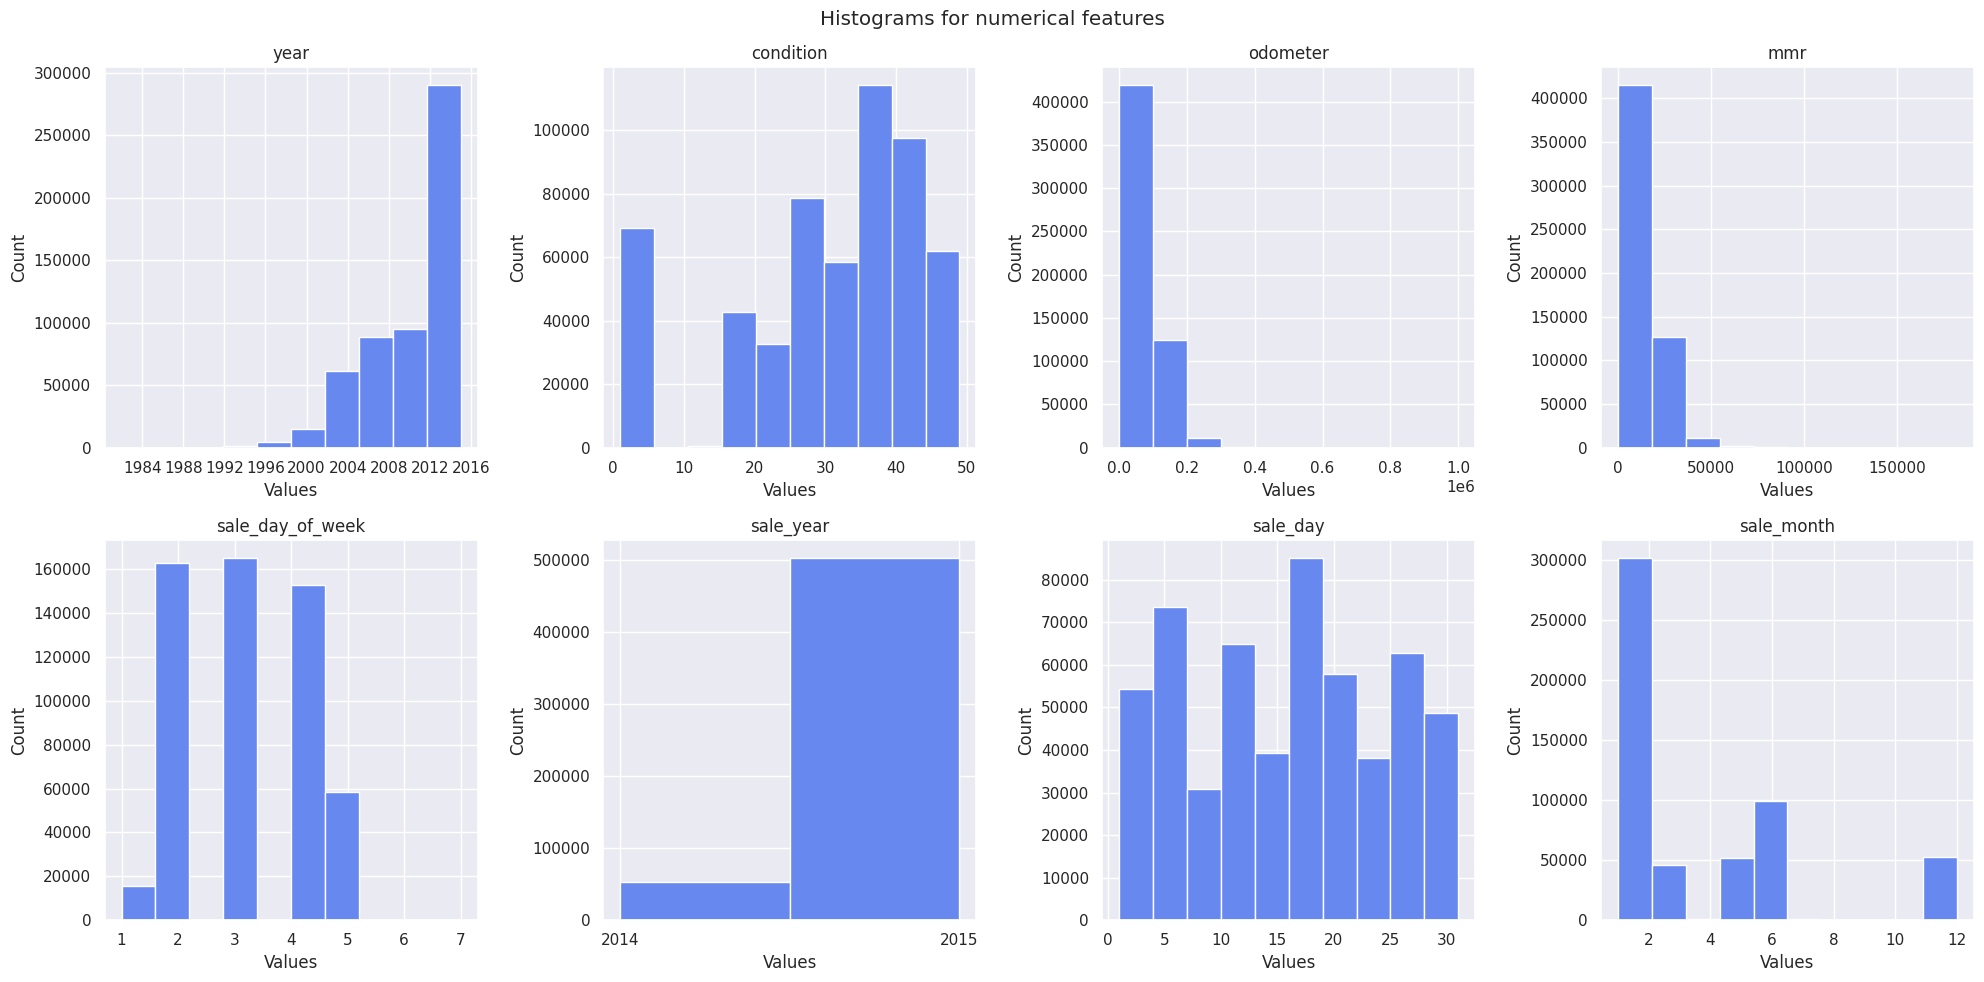

In [ ]:
sns.set(palette='coolwarm')
fig, axs = plt.subplots(2, len(numerical_features)//2, figsize=(20, 10))
fig.suptitle("Histograms for numerical features")
for idx, numerical in enumerate(numerical_features):
    idx_row = idx // 4
    idx_col = idx % 4
    axs[idx_row, idx_col].title.set_text(numerical)
    axs[idx_row, idx_col].set_xlabel("Values")
    axs[idx_row, idx_col].set_ylabel("Count")
    if "year" in numerical:
        axs[idx_row, idx_col].xaxis.set_major_locator(MaxNLocator(integer=True))
    if numerical == "sale_year":
        axs[idx_row, idx_col].hist(processed_dt[numerical], bins=2)
        continue
    axs[idx_row, idx_col].hist(processed_dt[numerical])
plt.tight_layout()
plt.show()

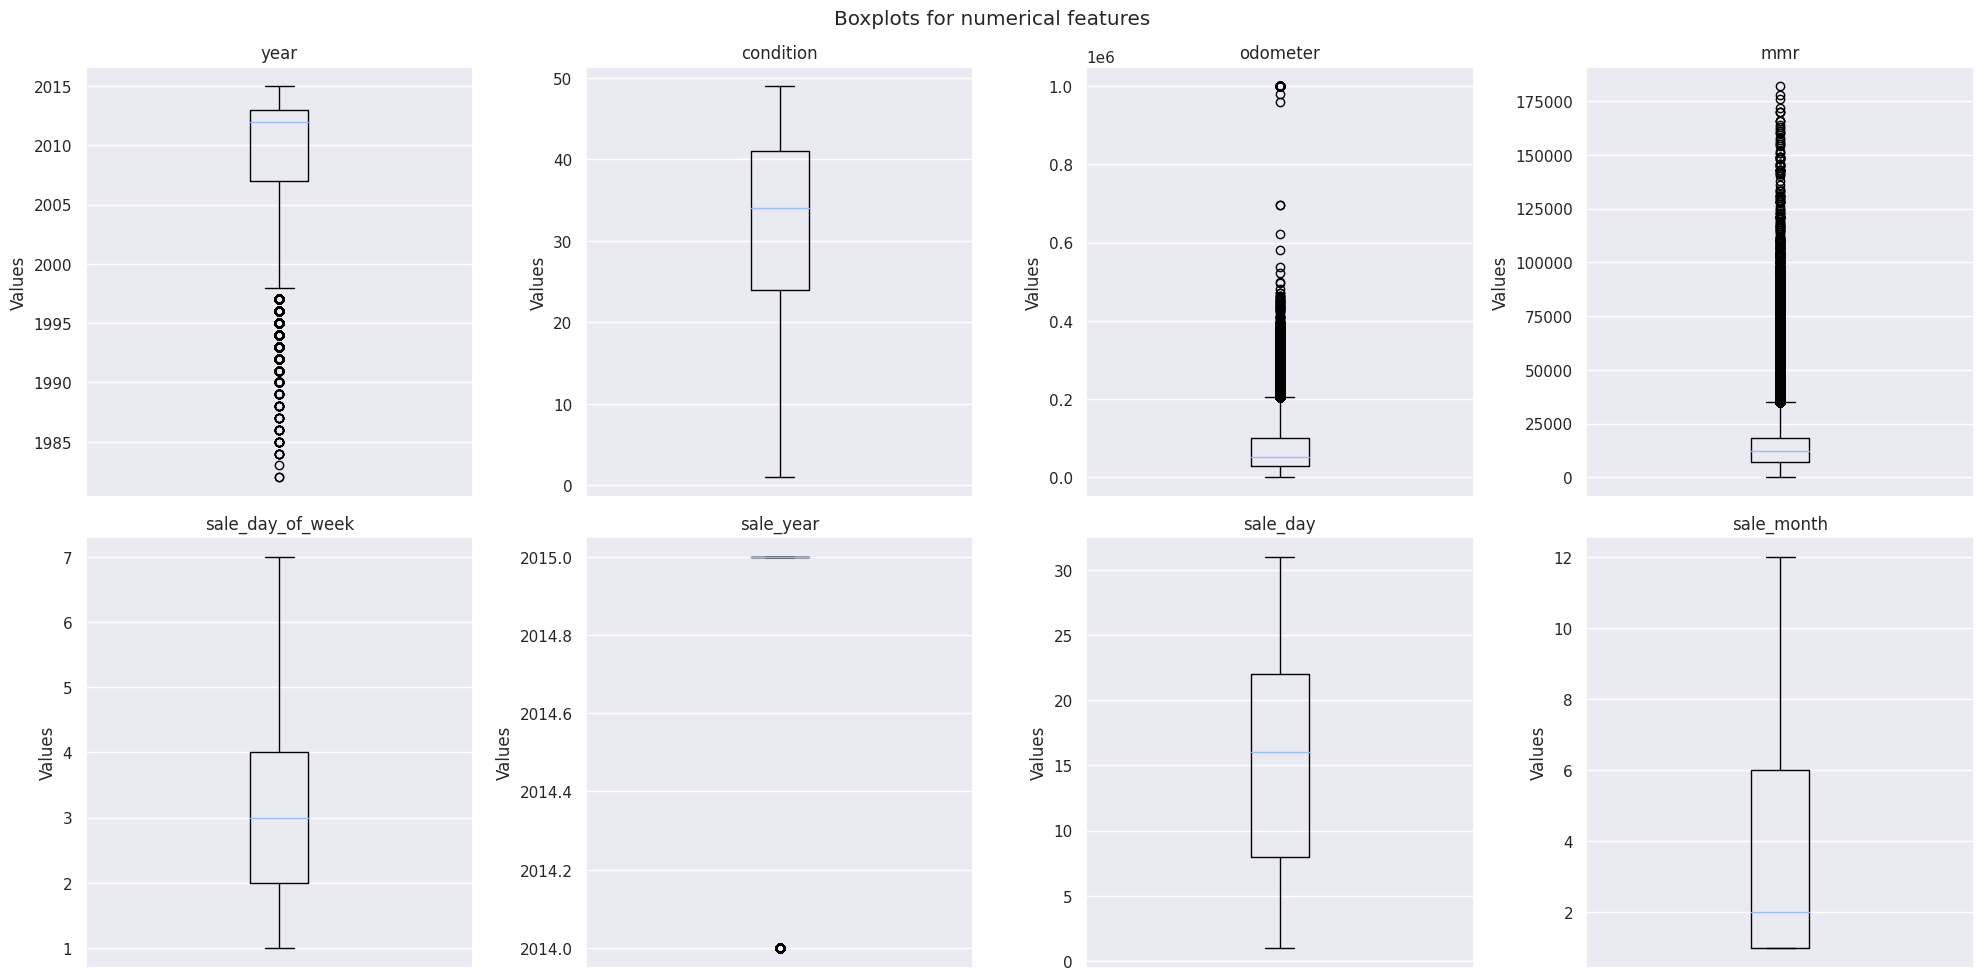

In [ ]:
sns.set(palette='coolwarm')
fig, axs = plt.subplots(2, len(numerical_features)//2, figsize=(20, 10))
fig.suptitle("Boxplots for numerical features")
for idx, numerical in enumerate(numerical_features):
    idx_row = idx // 4
    idx_col = idx % 4
    axs[idx_row, idx_col].title.set_text(numerical)
    axs[idx_row, idx_col].set_ylabel("Values")
    axs[idx_row, idx_col].get_xaxis().set_visible(False)
    axs[idx_row, idx_col].boxplot(processed_dt[numerical])
plt.tight_layout()
plt.show()

В столбцах 'odometer', 'mmr' и 'year' много выбросов. Скорее всего значения корректные, однако:
* в случае 'odometer' - это пробег автомобиля в милях. Из второго графика видно, что "допустимые" значения в районе 0.2e6 = 200 000. Учитывая, что средний пробег автомобился около 30км в год ~= 19миль в год, то получаем, что такой автомобиль должен использоваться около 10 000 лет. Есть случаи, когда пробег машины составляет свыше миллиона км, однако это исключительные редкости, поэтому данные выбросы стоит убрать из рассмотрения

* в случае 'mmr' - это цена автомобился в долларах. В случае некоторых моделей, она может достигать 100-150 тысяч, однако в большинстве случаев цена не превышает 50 тысяч. Поэтому данные выбросы также удалим из рассмотрения

* в случае 'year' - это год выпуска автомобиля. Выбросы в этой колонке связаны, скорее всего, с крайне малым количеством старых автомобилей в выборке. Так как их количество незначительно, они не окажут сильного влияния на качество работы модели. Поэтому данные выбросы тоже удалим из рассмотрения

In [ ]:
emission_cols = ["year", "odometer", "mmr"]

In [ ]:
filtered_dt = processed_dt

for col in emission_cols:
    q1, q3 = filtered_dt[col].quantile([.25, .75])
    iqr = q3 - q1
    filter = f'({q1} - 1.5 * {iqr}) <= {col} <= ({q3} + 1.5 * {iqr})'
    before = len(filtered_dt)
    filtered_dt = filtered_dt.query(filter)
    print(f"Emission in {col} deleted. Count: {before - len(filtered_dt)}")
print(f"Total deleted objects count: {len(processed_dt) - len(filtered_dt)}")

Emission in year deleted. Count: 3932
Emission in odometer deleted. Count: 9864
Emission in mmr deleted. Count: 16819
Total deleted objects count: 30615


In [ ]:
filtered_dt

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day_of_week,sale_year,sale_day,sale_month
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2,2014,16,12
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2,2014,16,12
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,4,2015,15,1
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,4,2015,29,1
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2,2014,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555357,2011,BMW,5 Series,528i,Sedan,automatic,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2,2015,7,7
555359,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,3,2015,8,7
555360,2012,BMW,X5,xDrive35d,SUV,automatic,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,3,2015,8,7
555361,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,4,2015,9,7


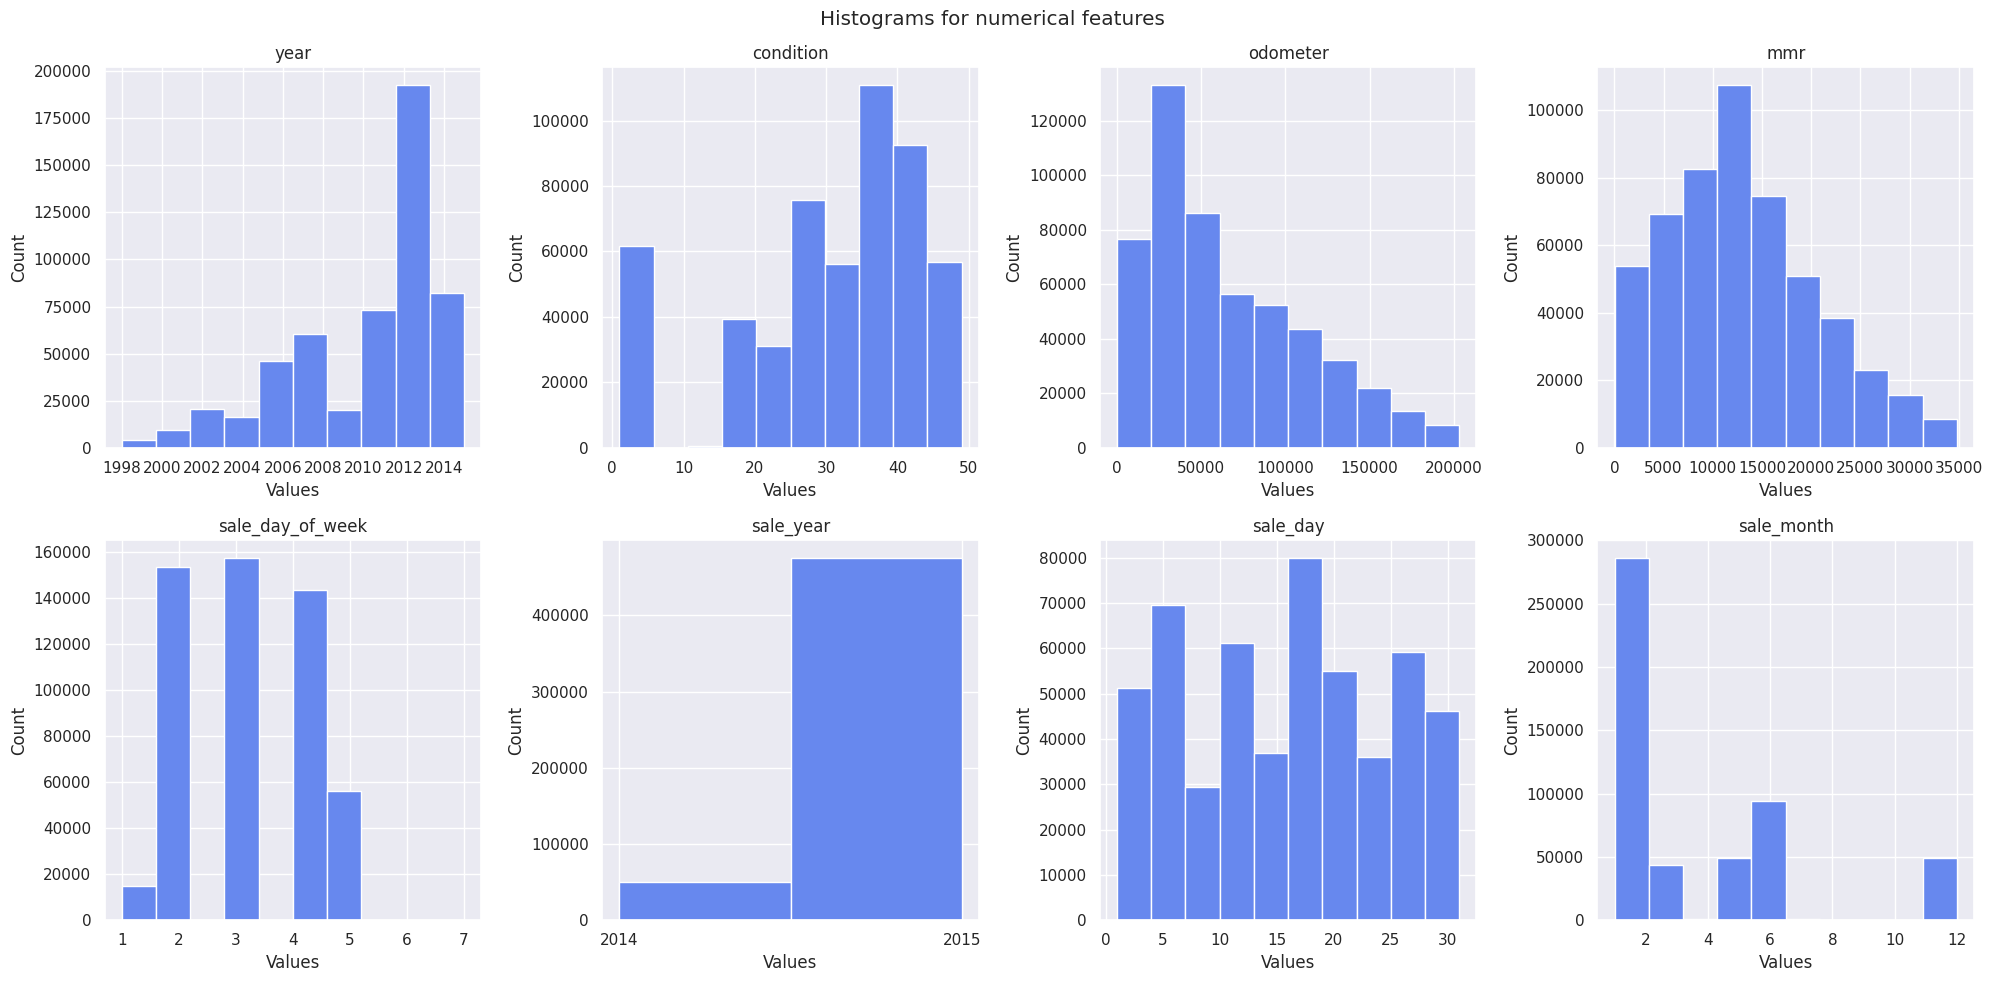

In [ ]:
sns.set(palette='coolwarm')
fig, axs = plt.subplots(2, len(numerical_features)//2, figsize=(20, 10))
fig.suptitle("Histograms for numerical features")
for idx, numerical in enumerate(numerical_features):
    idx_row = idx // 4
    idx_col = idx % 4
    axs[idx_row, idx_col].title.set_text(numerical)
    axs[idx_row, idx_col].set_xlabel("Values")
    axs[idx_row, idx_col].set_ylabel("Count")
    if "year" in numerical:
        axs[idx_row, idx_col].xaxis.set_major_locator(MaxNLocator(integer=True))
    if numerical == "sale_year":
        axs[idx_row, idx_col].hist(filtered_dt[numerical], bins=2)
        continue
    axs[idx_row, idx_col].hist(filtered_dt[numerical])
plt.tight_layout()
plt.show()

### Категориальные признаки

In [ ]:
def trim_str(base_str, max_lenght):
    if len(base_str) <= max_lenght:
        return base_str
    return f"{base_str[:max_lenght-3]}..."

In [ ]:
def sort_and_squeeze(counts: dict, max_count: int = 10, max_lenght=20) -> dict:
    labels = sorted(counts.keys(), reverse=True, key=lambda x: counts[x])
    filtered_counts = {key: counts[key] for key in labels[:max_count]}
    if len(labels) > max_count:
        filtered_counts["other"] = sum([counts[key] for key in labels[max_count:]])
    return {trim_str(key, max_lenght): value for key, value in filtered_counts.items()}

In [ ]:
print(f"Количество категориальных признаков: {len(categorical_features)}")

Количество категориальных признаков: 9


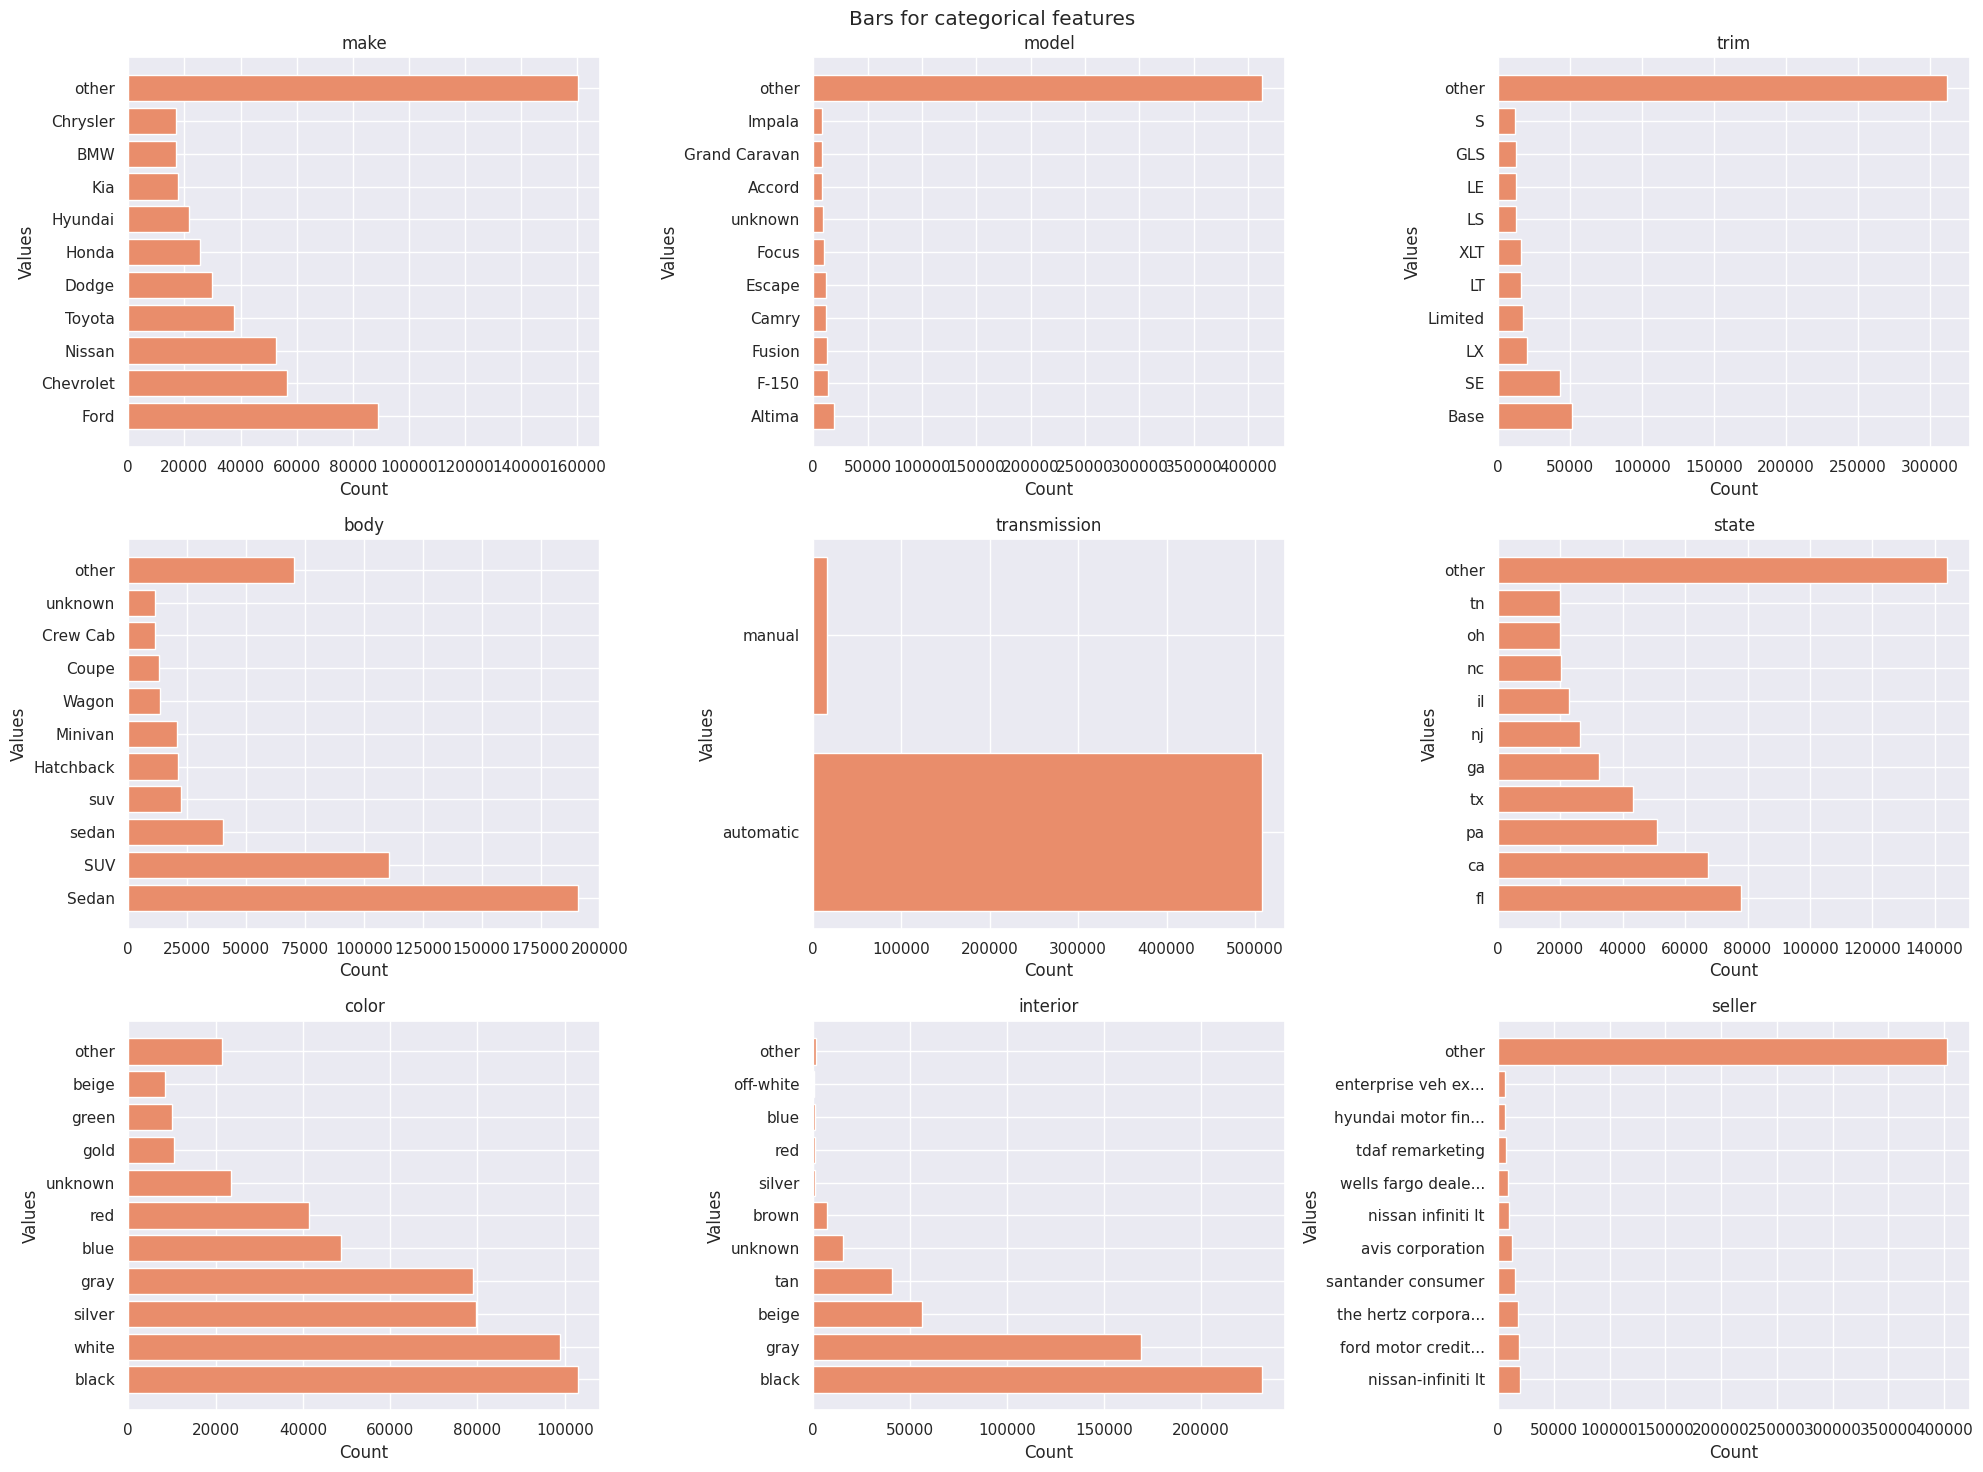

In [ ]:
sns.set(palette='flare')
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Bars for categorical features")
for idx, categorical in enumerate(categorical_features):
    filtered_counts = sort_and_squeeze(dict(filtered_dt[categorical].value_counts()))
    idx_row = idx // 3
    idx_col = idx % 3
    axs[idx_row, idx_col].title.set_text(categorical)
    axs[idx_row, idx_col].set_xlabel("Count")
    axs[idx_row, idx_col].set_ylabel("Values")
    axs[idx_row, idx_col].barh(list(filtered_counts.keys()), filtered_counts.values())
plt.tight_layout()
plt.show()

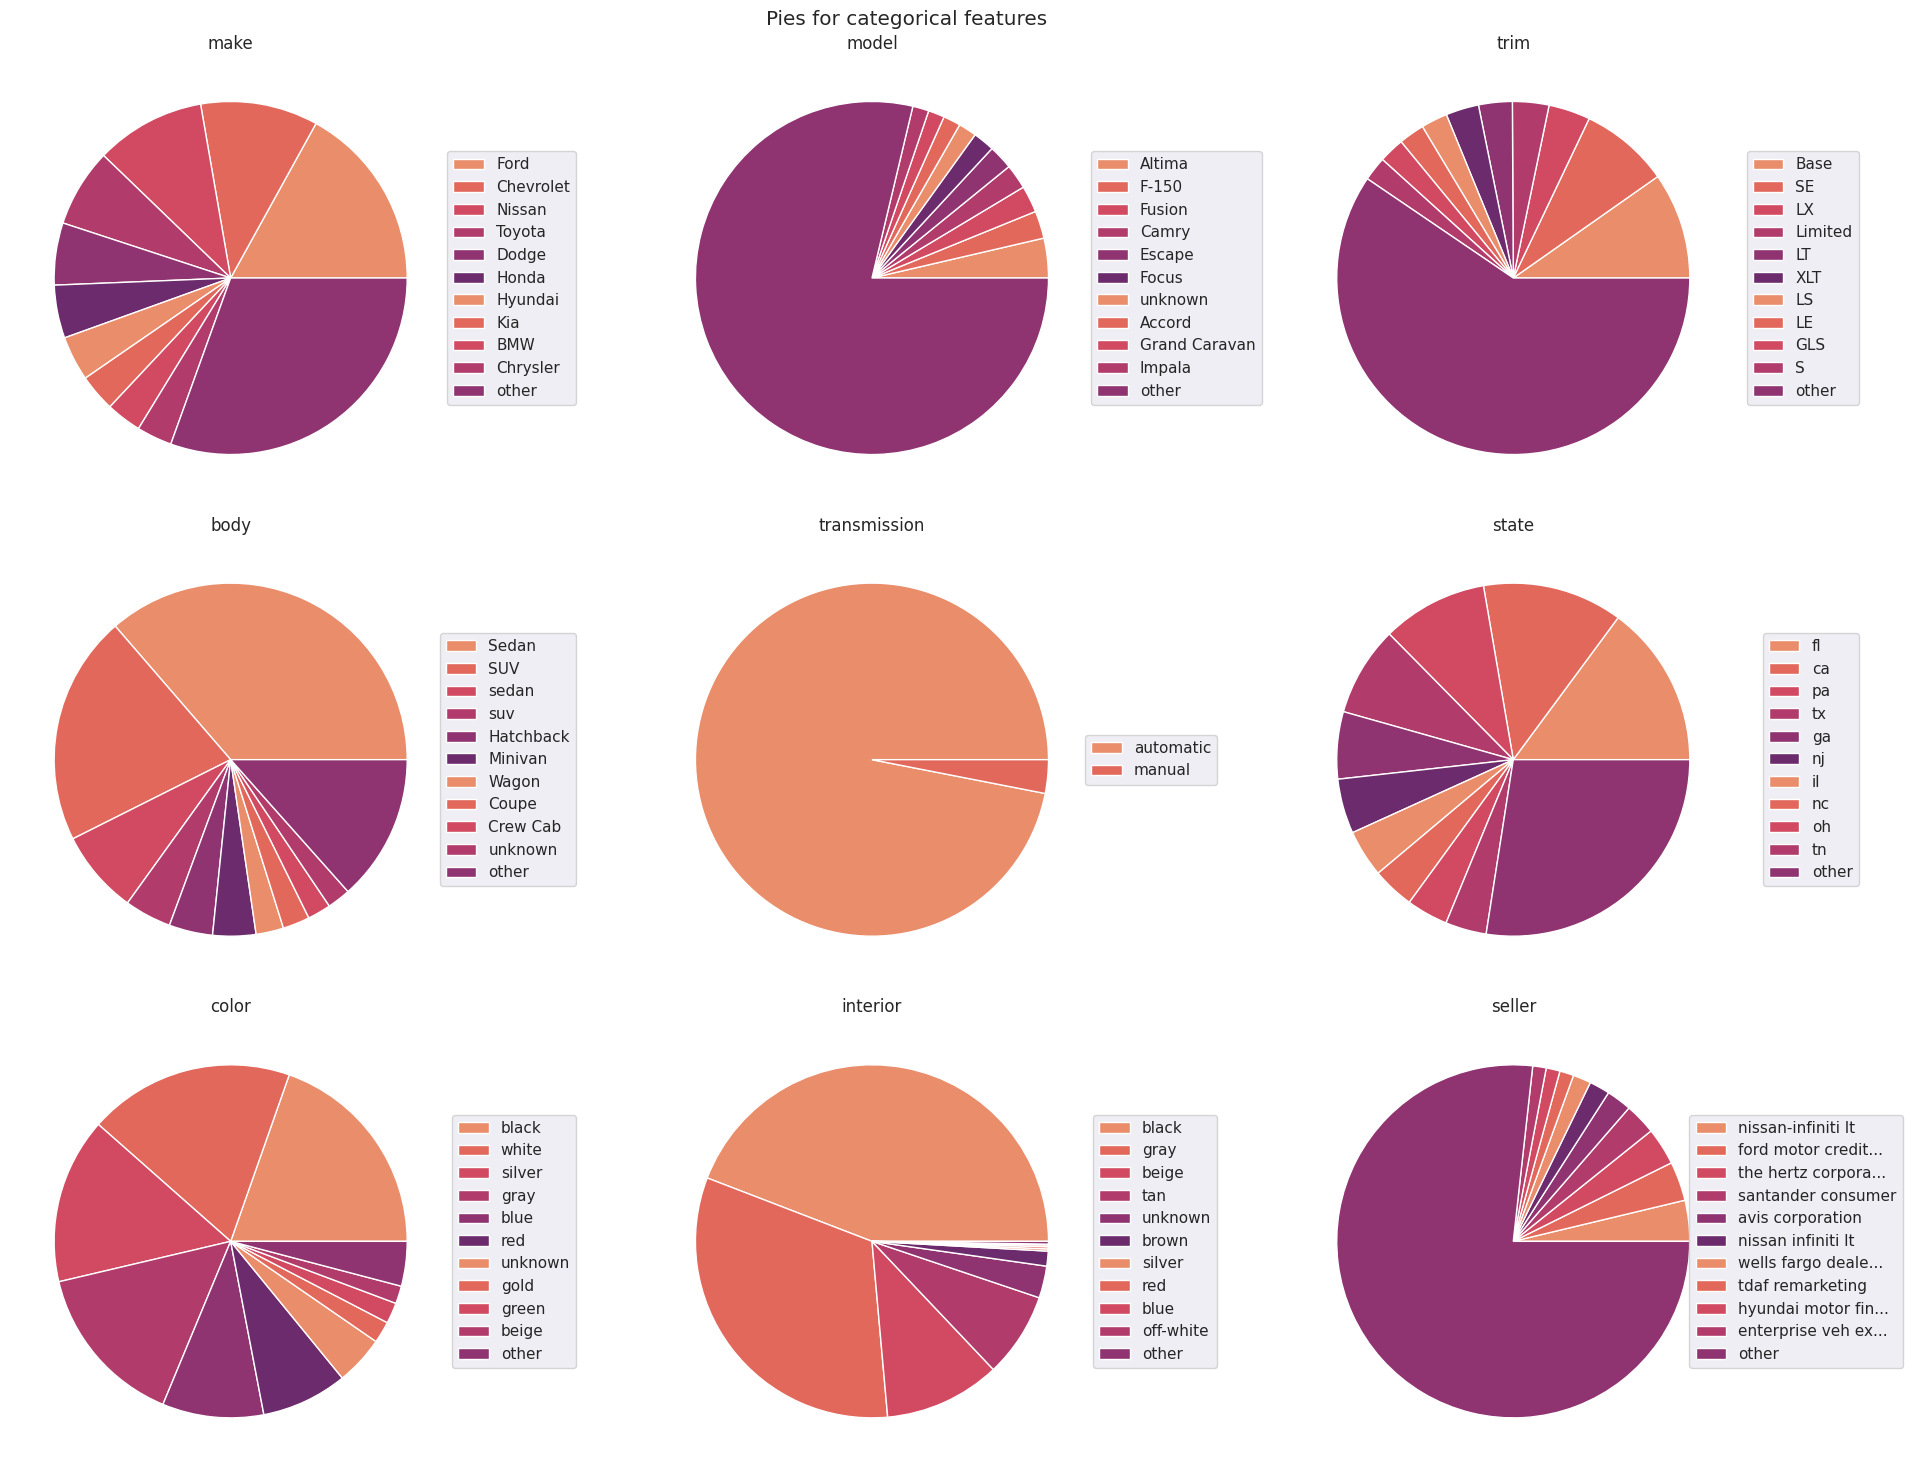

In [ ]:
sns.set(palette='flare')
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Pies for categorical features")
for idx, categorical in enumerate(categorical_features):
    filtered_counts = sort_and_squeeze(dict(filtered_dt[categorical].value_counts()))
    idx_row = idx // 3
    idx_col = idx % 3
    axs[idx_row, idx_col].title.set_text(categorical)
    patches, texts = axs[idx_row, idx_col].pie(filtered_counts.values())
    x_anchor = 1.3
    if categorical in ["seller", "model"]:
        x_anchor = 1.4
    axs[idx_row, idx_col].legend(patches, filtered_counts.keys(),
                                 loc='center right',
                                 bbox_to_anchor=(x_anchor, 0.5))
plt.tight_layout()
plt.show()

### Таргетное значение

Посмотрим на распределение таргетного значения

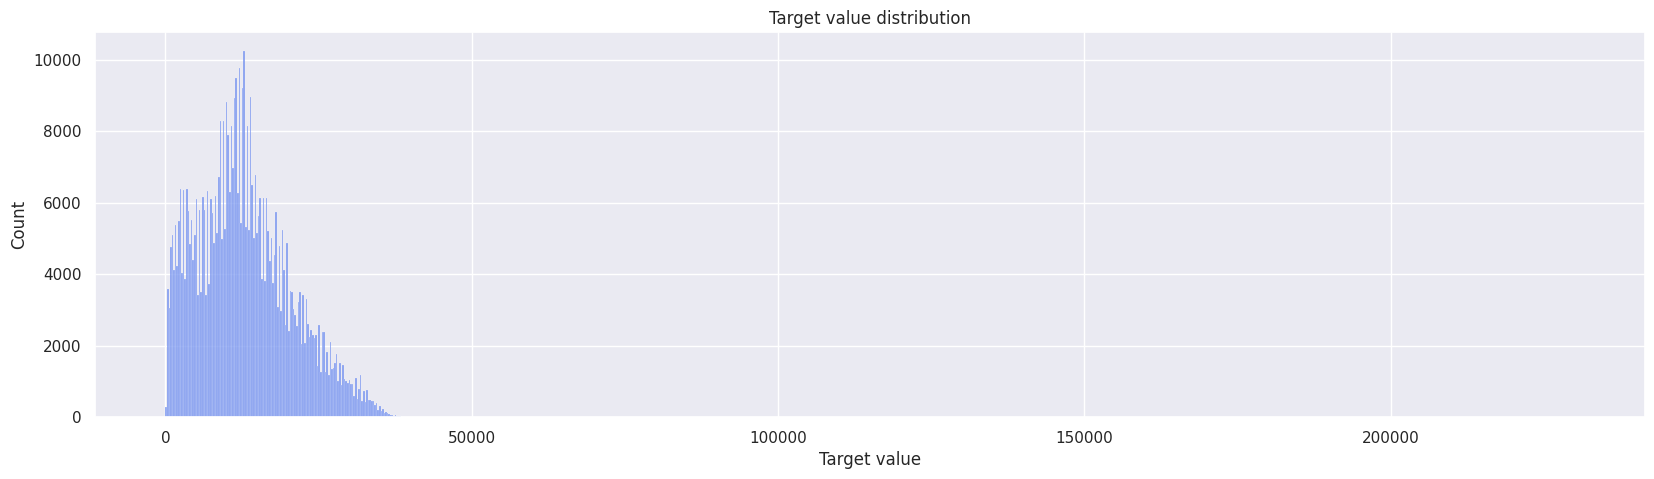

In [ ]:
sns.set(palette='coolwarm')
fig = plt.figure(figsize=(20, 5))
ax = sns.histplot(x=filtered_dt[target_col].values)
ax.set_xlabel("Target value")
ax.set_ylabel("Count")
plt.title("Target value distribution")
pass

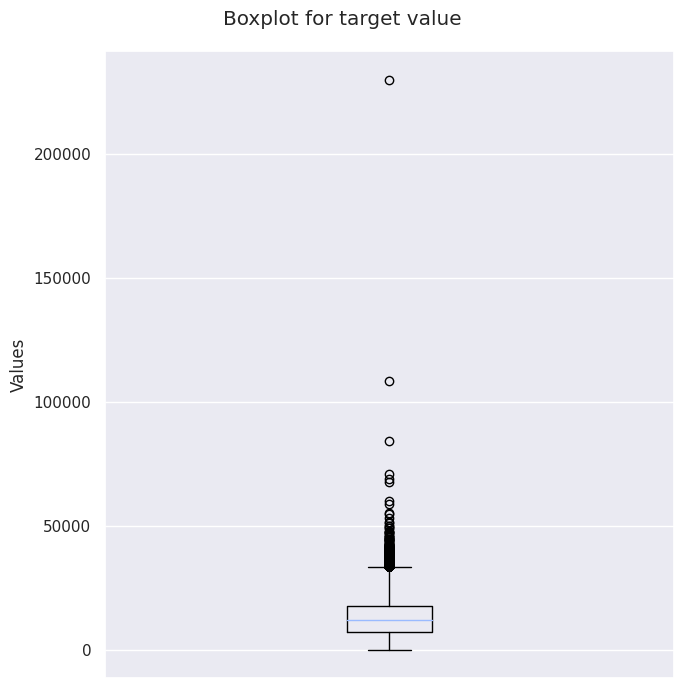

In [ ]:
sns.set(palette='coolwarm')
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
fig.suptitle("Boxplot for target value")
ax.set_ylabel("Values")
ax.get_xaxis().set_visible(False)
ax.boxplot(filtered_dt[target_col])
plt.tight_layout()
plt.show()

In [ ]:
q1, q3 = filtered_dt[target_col].quantile([.25, .75])
iqr = q3 - q1
filter = f'({q1} - 1.5 * {iqr}) <= {target_col} <= ({q3} + 1.5 * {iqr})'
before = len(filtered_dt)
filtered_dt = filtered_dt.query(filter)
print(f"Emission in {target_col} deleted. Count: {before - len(filtered_dt)}")

Emission in sellingprice deleted. Count: 3872


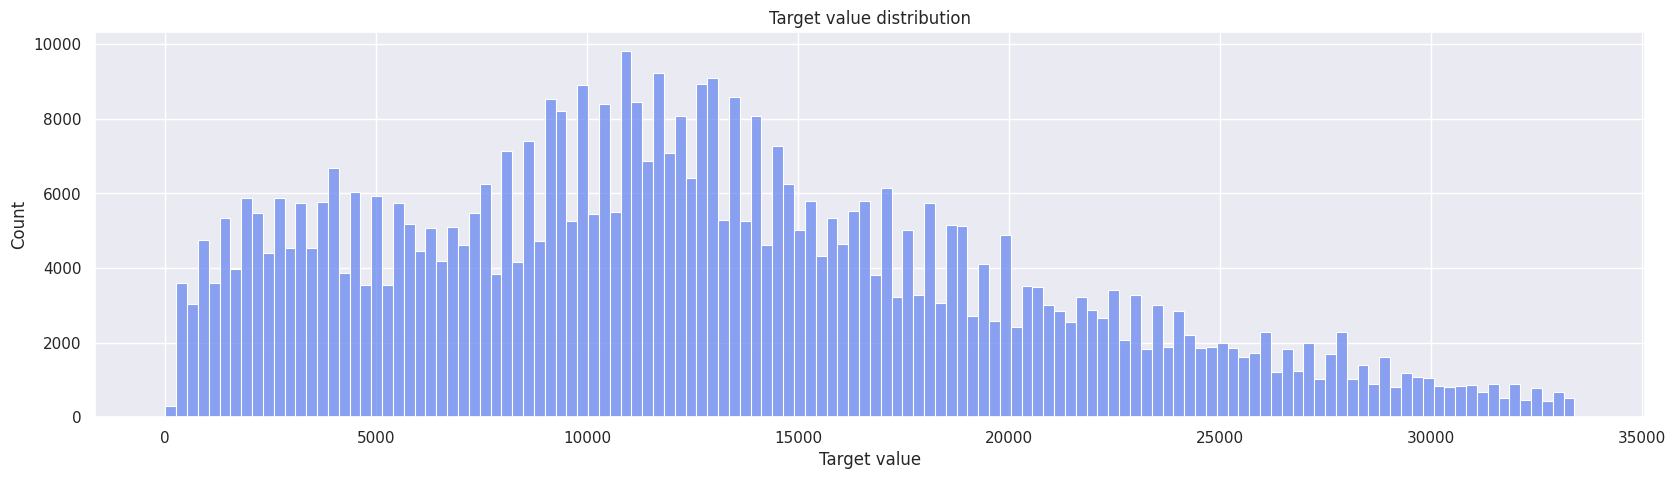

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = sns.histplot(x=filtered_dt[target_col].values)
ax.set_xlabel("Target value")
ax.set_ylabel("Count")
plt.title("Target value distribution")
pass

In [ ]:
filtered_dt

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day_of_week,sale_year,sale_day,sale_month
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2,2014,16,12
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2,2014,16,12
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,4,2015,15,1
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,4,2015,29,1
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2,2014,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555356,2012,Nissan,Sentra,2.0 SR,Sedan,automatic,tn,26.0,35858.0,white,gray,nissan-infiniti lt,9950.0,10400.0,3,2015,8,7
555357,2011,BMW,5 Series,528i,Sedan,automatic,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2,2015,7,7
555359,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,3,2015,8,7
555361,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,4,2015,9,7


In [ ]:
filtered_dt.to_csv(CFG.data_path + "filtered_dt.csv", index=False)